In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Data file.csv", index_col="msisdn")

In [3]:
data.columns

Index(['Unnamed: 0', 'label', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [4]:
data.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [5]:
data.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
msisdn,,,,,,,,,,,,,,,,,,,,,
21408I70789,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
76462I70374,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
17943I70372,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
55773I70781,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
03813I82730,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [6]:
data.shape

(209593, 35)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209593 entries, 21408I70789 to 65061I85339
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int

In [8]:
data.describe(include="object")

,pcircle,pdate
count,209593,209593
unique,1,82
top,UPW,2016-07-04
freq,209593,3150


In [9]:
data.drop(columns=["pcircle", "pdate"], inplace=True)
#as these two columns are unwanted for model building, we are working with one telecom circle "UPW" and 'pdate' is probably representing the date of collection of the data.

In [10]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [11]:
data.lt(0).sum()

label                      0
aon                     1539
daily_decr30            1839
daily_decr90            1839
rental30                5628
rental90                5929
last_rech_date_ma       1315
last_rech_date_da         14
last_rech_amt_ma           0
cnt_ma_rech30              0
fr_ma_rech30               0
sumamnt_ma_rech30          0
medianamnt_ma_rech30       0
medianmarechprebal30    1646
cnt_ma_rech90              0
fr_ma_rech90               0
sumamnt_ma_rech90          0
medianamnt_ma_rech90       0
medianmarechprebal90    1730
cnt_da_rech30              0
fr_da_rech30               0
cnt_da_rech90              0
fr_da_rech90               0
cnt_loans30                0
amnt_loans30               0
maxamnt_loans30            0
medianamnt_loans30         0
cnt_loans90                0
amnt_loans90               0
maxamnt_loans90            0
medianamnt_loans90         0
payback30                  0
payback90                  0
dtype: int64

In [12]:
cols=data.columns
for col in cols:
    data[col]=data[col].apply(lambda x:(x*-1) if x<0 else x)

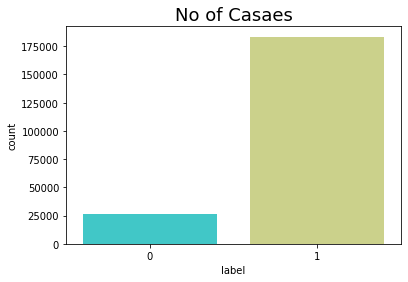

1    183431
0     26162
Name: label, dtype: int64


<Figure size 432x288 with 0 Axes>

In [13]:
sns.countplot(x="label",data=data, palette="rainbow")
plt.title("No of Casaes", fontsize=18)
plt.show()
print(data["label"].value_counts())
plt.savefig("No. of cases3.png")

In [14]:
data.groupby("label")["aon"].aggregate(["mean", "median", "max", "min", "count", "std"])
#as "aon" or age on cellular network in days can not be represented by negative values, we can convert them into positive values to make it meaningfull. 

,mean,median,max,min,count,std
label,,,,,,
0,8871.977241,399.0,995148.346759,1.0,26162,79707.779819
1,8004.531672,545.0,999860.755168,1.0,183431,75105.997239


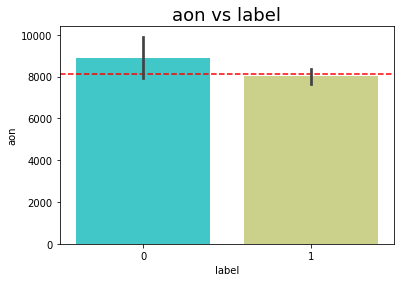

,mean,max,min,count,std
label,,,,,
0,8871.977241,995148.346759,1.0,26162,79707.779819
1,8004.531672,999860.755168,1.0,183431,75105.997239


In [15]:
mean_days=np.mean(data["aon"])
plt.axhline(mean_days, color="red", linestyle="dashed")
sns.barplot(x="label",y="aon", data=data, palette="rainbow")
plt.title("aon vs label", fontsize=18)
plt.show()
data.groupby("label")["aon"].aggregate(["mean", max, min, "count", "std"])

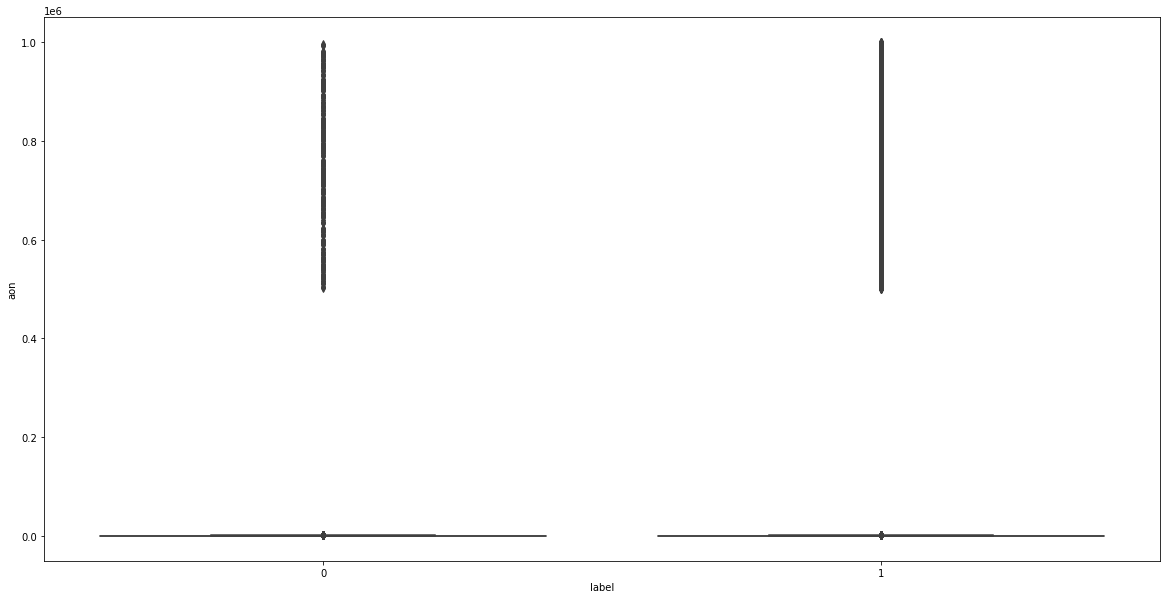

In [16]:
plt.figure(figsize=(20,10))
sns.boxplot(y="aon", x="label", data=data)
plt.show()

In [17]:
data.groupby("label")["daily_decr30"].aggregate(["mean", "median", max, min, "count", "std"])
print("Obsevation: as 'daily_decr30' or Daily amount spent from main account, averaged over last 30 days can not be represented by negative values, we can convert them into positive values to make it meaningfull.")

Obsevation: as 'daily_decr30' or Daily amount spent from main account, averaged over last 30 days can not be represented by negative values, we can convert them into positive values to make it meaningfull.


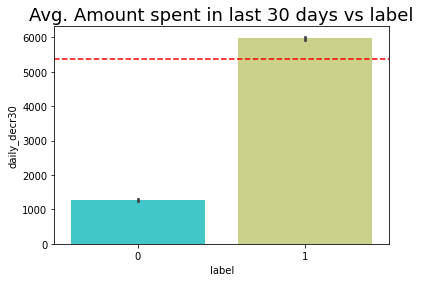

Observation: Mean daily amount in last 30 days is for label 1 which is very less for labeled 0 customers or defaulters.
      Outliers are present. After removing the outliers the mean value of both the labels will be reduced.


In [18]:
mean_irs=np.mean(data["daily_decr30"])
plt.axhline(mean_irs, color="red", linestyle="dashed")
sns.barplot(x="label",y="daily_decr30", data=data, palette="rainbow")
plt.title("Avg. Amount spent in last 30 days vs label", fontsize=18)
plt.show()
data.groupby("label")["daily_decr30"].aggregate(["mean", max, min, "count", "std"])
print('''Observation: Mean daily amount in last 30 days is for label 1 which is very less for labeled 0 customers or defaulters.
      Outliers are present. After removing the outliers the mean value of both the labels will be reduced.''')

In [19]:
data.groupby("label")["daily_decr90"].aggregate(["mean", "median", max, min, "count", "std"])
#as "daily_decr90" or Daily amount spent from main account, averaged over last 30 days can not be represented by negative values, we can convert them into positive values to make it meaningfull. 

,mean,median,max,min,count,std
label,,,,,,
0,1278.963403,35.195,103884.61,0.0,26162,3181.243647
1,6767.658866,2190.950,320630.00,0.0,183431,11446.410066


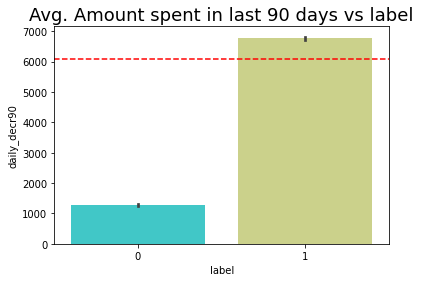

,mean,max,min,count,std
label,,,,,
0,1278.963403,103884.61,0.0,26162,3181.243647
1,6767.658866,320630.00,0.0,183431,11446.410066


In [20]:
mean_irs90=np.mean(data["daily_decr90"])
plt.axhline(mean_irs90, color="red", linestyle="dashed")
sns.barplot(x="label",y="daily_decr90", data=data, palette="rainbow")
plt.title("Avg. Amount spent in last 90 days vs label", fontsize=18)
plt.show()
data.groupby("label")["daily_decr90"].aggregate(["mean", max, min, "count", "std"])

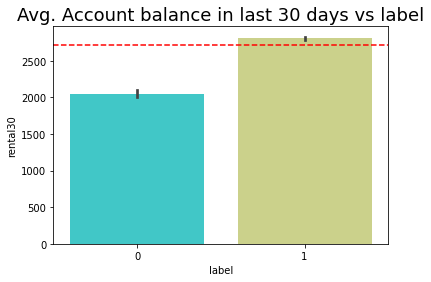

,mean,max,min,count,std
label,,,,,
0,2048.543301,74214.44,0.0,26162,3746.295897
1,2810.484210,198926.11,0.0,183431,4358.515488


In [21]:
mean_rent30=np.mean(data["rental30"])
plt.axhline(mean_rent30, color="red", linestyle="dashed")
sns.barplot(x="label",y="rental30", data=data, palette="rainbow")
plt.title("Avg. Account balance in last 30 days vs label", fontsize=18)
plt.show()
data.groupby("label")["rental30"].aggregate(["mean", max, min, "count", "std"])

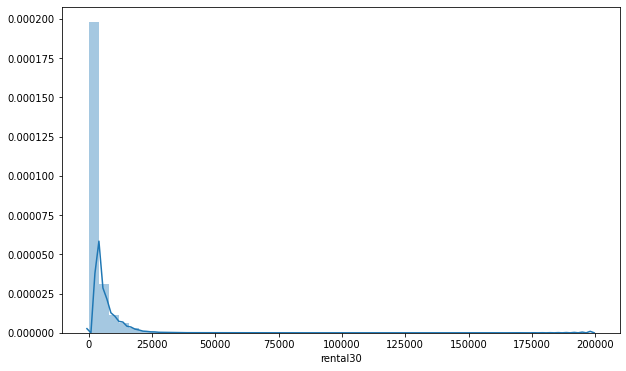

In [22]:
plt.figure(figsize=(10,6))
sns.distplot(a=data["rental30"])
plt.show()

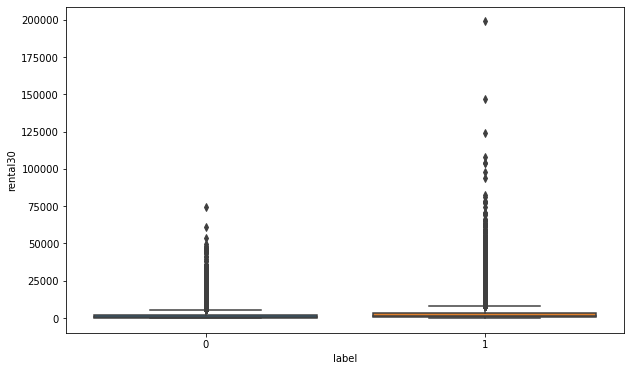

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(y="rental30", x="label", data=data)
plt.show()

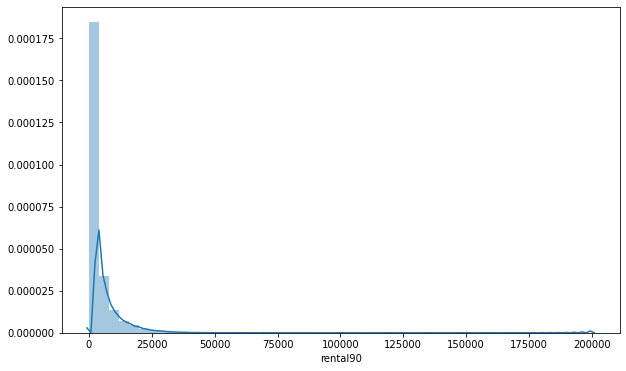

In [24]:
plt.figure(figsize=(10,6))
sns.distplot(a=data["rental90"])
plt.show()

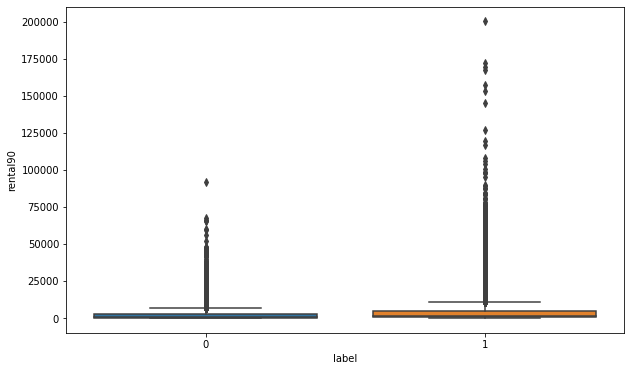

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(y="rental90", x="label", data=data)
plt.show()

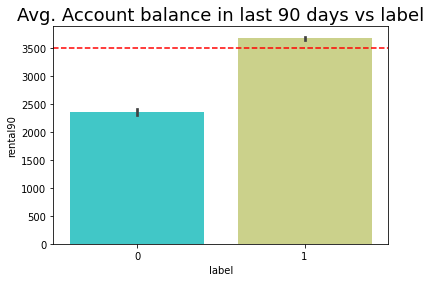

,mean,max,min,count,std
label,,,,,
0,2350.928400,91595.72,0.0,26162,4341.280947
1,3674.738986,200148.11,0.0,183431,5910.353014


In [26]:
mean_rent90=np.mean(data["rental90"])
plt.axhline(mean_rent90, color="red", linestyle="dashed")
sns.barplot(x="label",y="rental90", data=data, palette="rainbow")
plt.title("Avg. Account balance in last 90 days vs label", fontsize=18)
plt.show()
data.groupby("label")["rental90"].aggregate(["mean", max, min, "count", "std"])

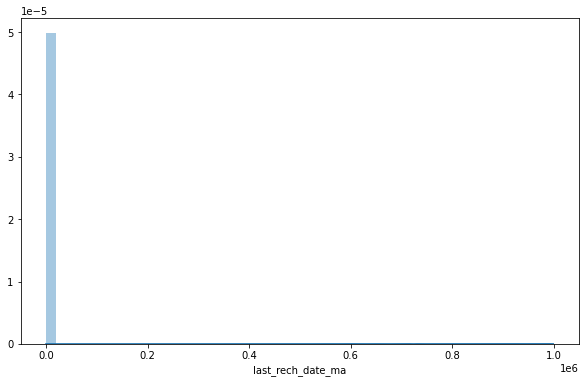

In [27]:
plt.figure(figsize=(10,6))
sns.distplot(a=data["last_rech_date_ma"])
plt.show()

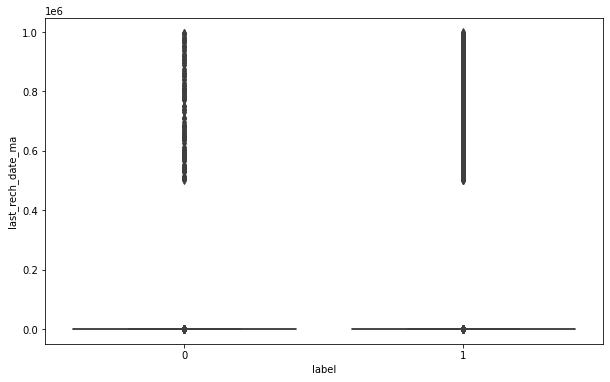

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(y="last_rech_date_ma", x="label", data=data)
plt.show()

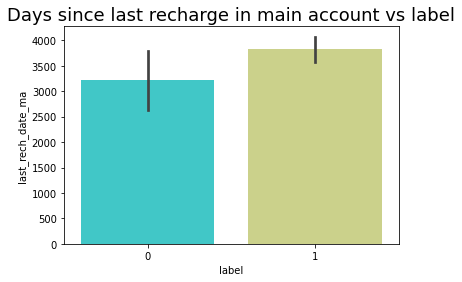

,mean,max,min,count,std
label,,,,,
0,3223.706824,997676.760075,0.0,26162,49421.871292
1,3832.062552,998650.377733,0.0,183431,54515.064548


In [35]:
sns.barplot(x="label",y="last_rech_date_ma", data=data, palette="rainbow")
plt.title("Days since last recharge in main account vs label", fontsize=18)
plt.show()
data.groupby("label")["last_rech_date_ma"].aggregate(["mean", max, min, "count", "std"])

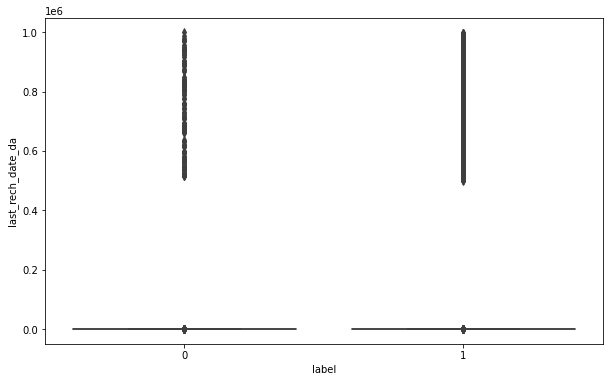

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(y="last_rech_date_da", x="label", data=data)
plt.show()

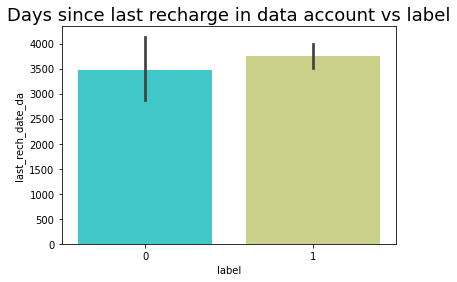

,mean,max,min,count,std
label,,,,,
0,3470.381002,999171.809410,0.0,26162,51637.471409
1,3746.695122,997920.294292,0.0,183431,53618.087058


In [38]:
sns.barplot(x="label",y="last_rech_date_da", data=data, palette="rainbow")
plt.title("Days since last recharge in data account vs label", fontsize=18)
plt.show()
data.groupby("label")["last_rech_date_da"].aggregate(["mean", "max", "min", "count", "std"])

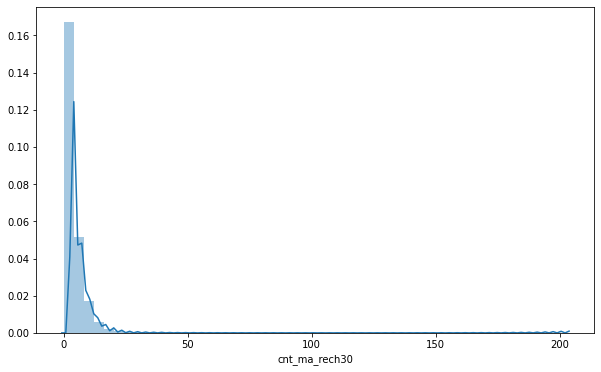

In [40]:
plt.figure(figsize=(10,6))
sns.distplot(a=data["cnt_ma_rech30"])
plt.show()

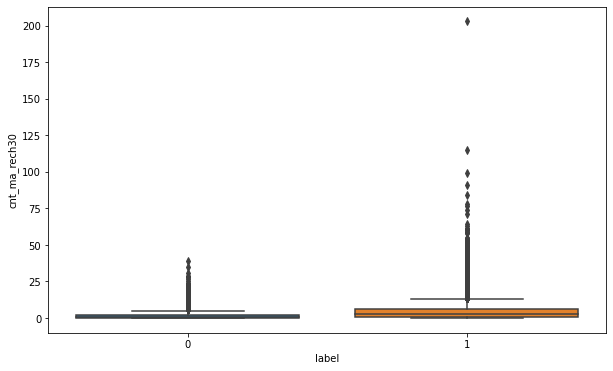

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(y="cnt_ma_rech30", x="label", data=data)
plt.show()

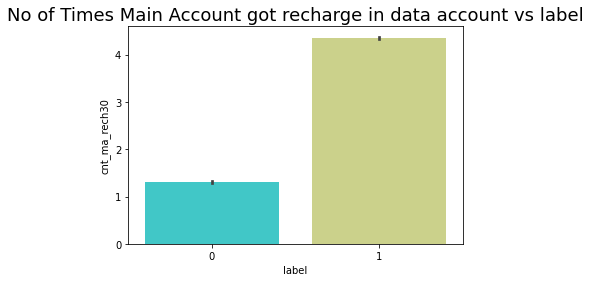

,mean,max,min,count,std
label,,,,,
0,1.303417,39,0,26162,2.021023
1,4.359530,203,0,183431,4.353103


In [42]:
sns.barplot(x="label",y="cnt_ma_rech30", data=data, palette="rainbow")
plt.title("No of Times Main Account got recharge in data account vs label", fontsize=18)
plt.show()
data.groupby("label")["cnt_ma_rech30"].aggregate(["mean", max, min, "count", "std"])

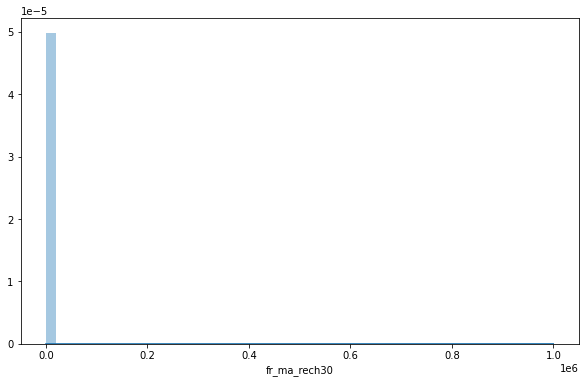

In [45]:
plt.figure(figsize=(10,6))
sns.distplot(a=data["fr_ma_rech30"])
plt.show()

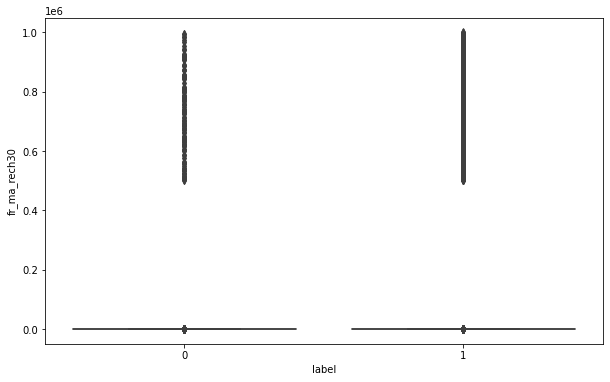

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(y="fr_ma_rech30", x="label", data=data)
plt.show()

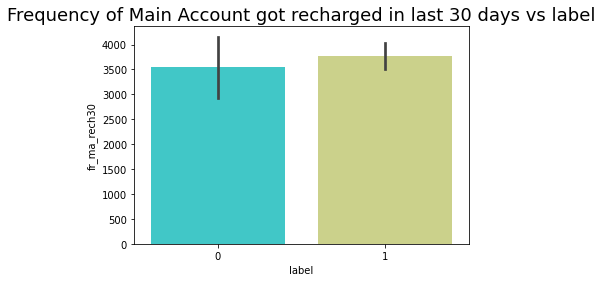

,mean,max,min,count,std
label,,,,,
0,3548.410637,994205.818046,0.0,26162,51643.670980
1,3764.303486,999606.368132,0.0,183431,53922.908833


In [47]:
sns.barplot(x="label",y="fr_ma_rech30", data=data, palette="rainbow")
plt.title("Frequency of Main Account got recharged in last 30 days vs label", fontsize=18)
plt.show()
data.groupby("label")["fr_ma_rech30"].aggregate(["mean", max, min, "count", "std"])

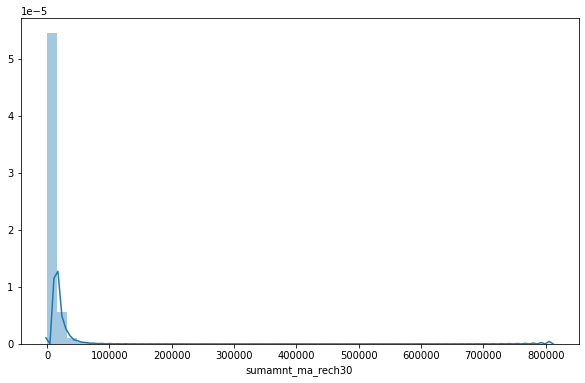

In [50]:
plt.figure(figsize=(10,6))
sns.distplot(a=data["sumamnt_ma_rech30"])
plt.show()

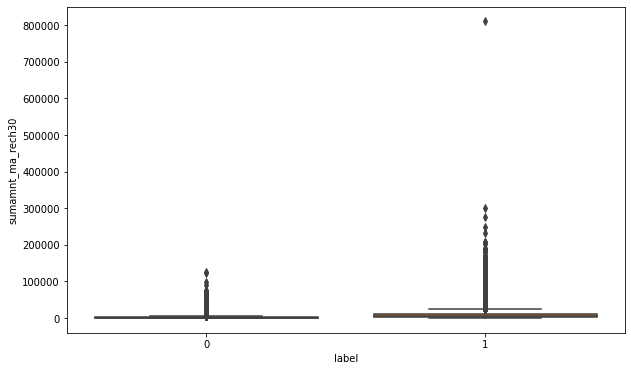

In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(y="sumamnt_ma_rech30", x="label", data=data)
plt.show()

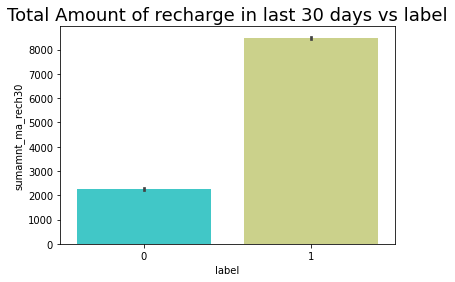

,mean,max,min,count,std
label,,,,,
0,2258.849629,126626.0,0.0,26162,4558.161211
1,8481.191767,810096.0,0.0,183431,10472.801373


In [52]:
sns.barplot(x="label",y="sumamnt_ma_rech30", data=data, palette="rainbow")
plt.title("Total Amount of recharge in last 30 days vs label", fontsize=18)
plt.show()
data.groupby("label")["sumamnt_ma_rech30"].aggregate(["mean", max, min, "count", "std"])

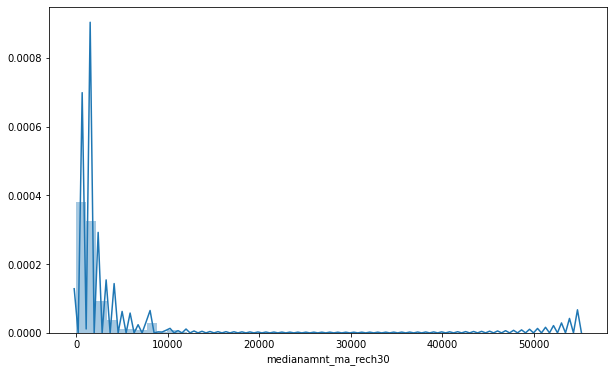

In [55]:
plt.figure(figsize=(10,6))
sns.distplot(a=data["medianamnt_ma_rech30"])
plt.show()

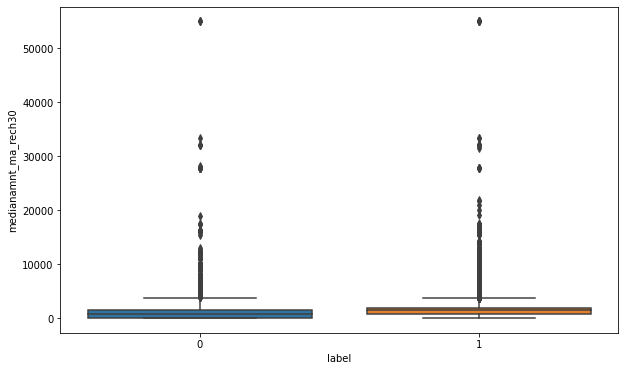

In [56]:
plt.figure(figsize=(10,6))
sns.boxplot(y="medianamnt_ma_rech30", x="label", data=data)
plt.show()

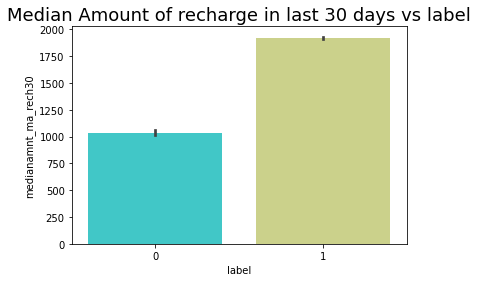

,mean,max,min,count,std
label,,,,,
0,1036.967185,55000.0,0.0,26162,1819.041001
1,1923.474317,55000.0,0.0,183431,2080.892330


In [57]:
sns.barplot(x="label",y="medianamnt_ma_rech30", data=data, palette="rainbow")
plt.title("Median Amount of recharge in last 30 days vs label", fontsize=18)
plt.show()
data.groupby("label")["medianamnt_ma_rech30"].aggregate(["mean", max, min, "count", "std"])

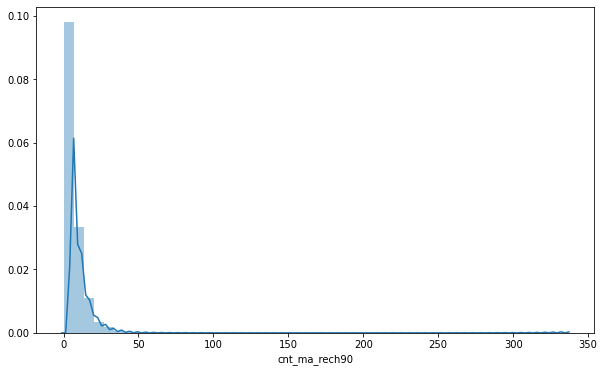

In [60]:
plt.figure(figsize=(10,6))
sns.distplot(a=data["cnt_ma_rech90"])
plt.show()

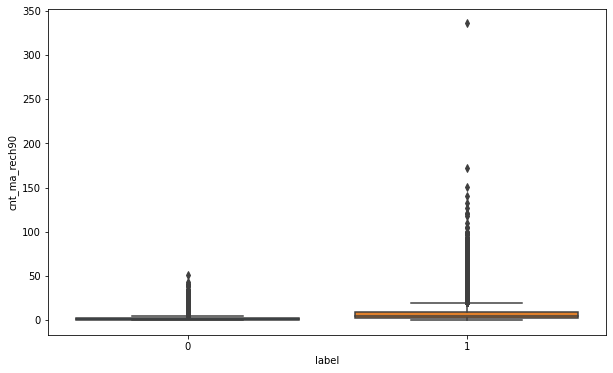

In [61]:
plt.figure(figsize=(10,6))
sns.boxplot(y="cnt_ma_rech90", x="label", data=data)
plt.show()

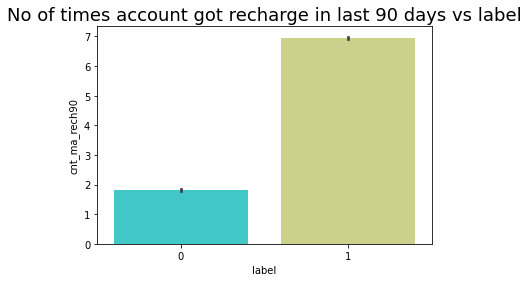

,mean,max,min,count,std
label,,,,,
0,1.812744,51,0,26162,2.778879
1,6.957630,336,0,183431,7.397362


In [62]:
sns.barplot(x="label",y="cnt_ma_rech90", data=data, palette="rainbow")
plt.title("No of times account got recharge in last 90 days vs label", fontsize=18)
plt.show()
data.groupby("label")["cnt_ma_rech90"].aggregate(["mean", max, min, "count", "std"])



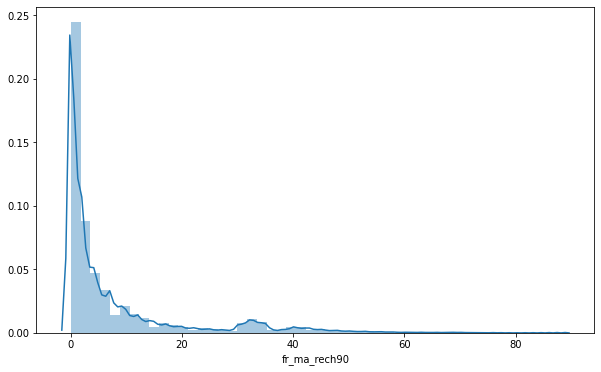

In [65]:
plt.figure(figsize=(10,6))
sns.distplot(a=data["fr_ma_rech90"])
plt.show()

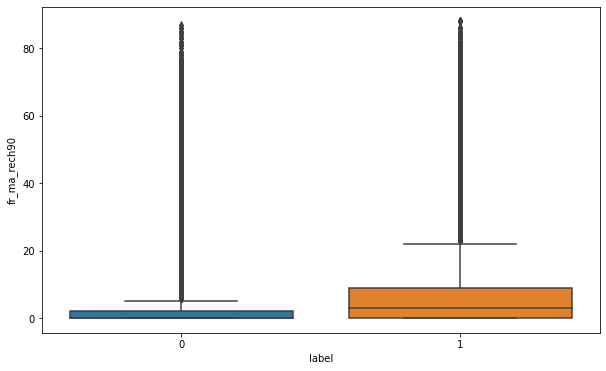

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(y="fr_ma_rech90", x="label", data=data)
plt.show()

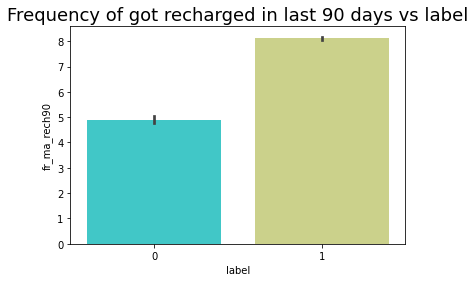

,mean,max,min,count,std
label,,,,,
0,4.903601,87,0,26162,11.817407
1,8.118012,88,0,183431,12.645785


In [67]:
sns.barplot(x="label",y="fr_ma_rech90", data=data, palette="rainbow")
plt.title("Frequency of got recharged in last 90 days vs label", fontsize=18)
plt.show()
data.groupby("label")["fr_ma_rech90"].aggregate(["mean", max, min, "count", "std"])

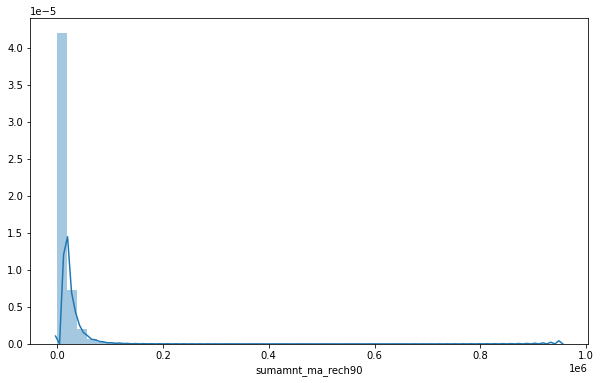

In [70]:
plt.figure(figsize=(10,6))
sns.distplot(a=data["sumamnt_ma_rech90"])
plt.show()

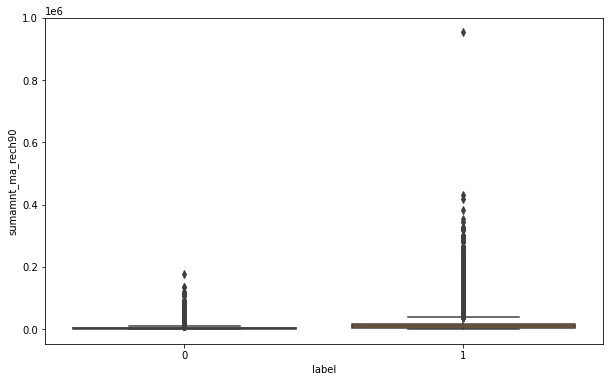

In [71]:
plt.figure(figsize=(10,6))
sns.boxplot(y="sumamnt_ma_rech90", x="label", data=data)
plt.show()

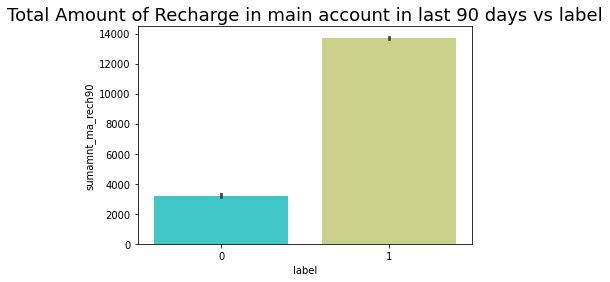

,mean,max,min,count,std
label,,,,,
0,3210.102783,175676,0,26162,6283.083435
1,13706.395778,953036,0,183431,17473.844265


In [72]:
sns.barplot(x="label",y="sumamnt_ma_rech90", data=data, palette="rainbow")
plt.title("Total Amount of Recharge in main account in last 90 days vs label", fontsize=18)
plt.show()
data.groupby("label")["sumamnt_ma_rech90"].aggregate(["mean", max, min, "count", "std"])

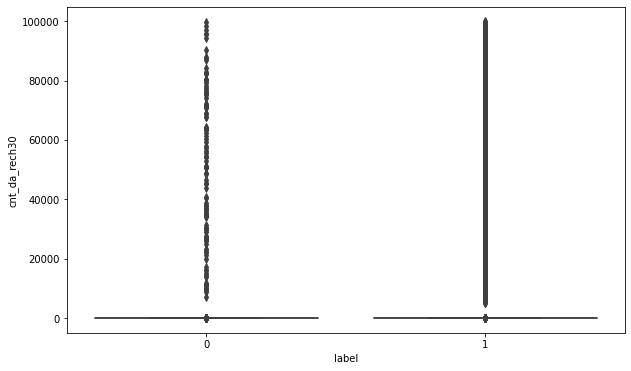

In [74]:
plt.figure(figsize=(10,6))
sns.boxplot(y="cnt_da_rech30", x="label", data=data)
plt.show()

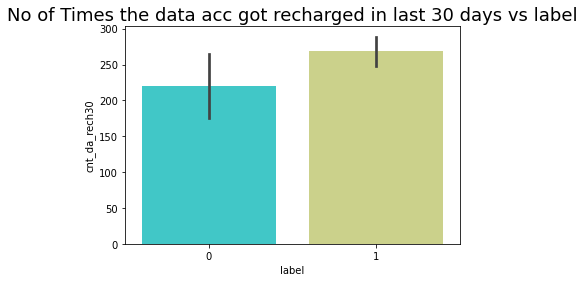

,mean,max,min,count,std
label,,,,,
0,220.177745,99665.854254,0.0,26162,3738.621601
1,268.625497,99914.441420,0.0,183431,4243.575256


In [75]:
sns.barplot(x="label",y="cnt_da_rech30", data=data, palette="rainbow")
plt.title("No of Times the data acc got recharged in last 30 days vs label", fontsize=18)
plt.show()
data.groupby("label")["cnt_da_rech30"].aggregate(["mean", max, min, "count", "std"])

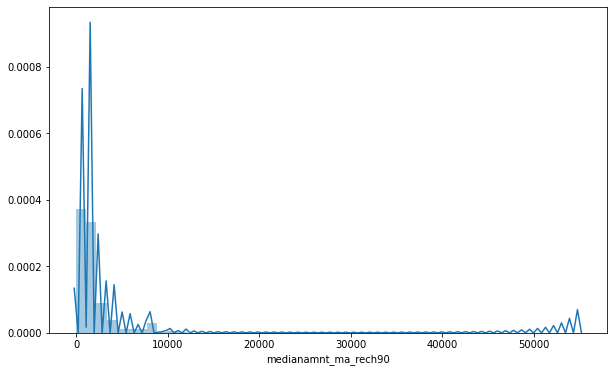

In [77]:
plt.figure(figsize=(10,6))
sns.distplot(a=data["medianamnt_ma_rech90"])
plt.show()

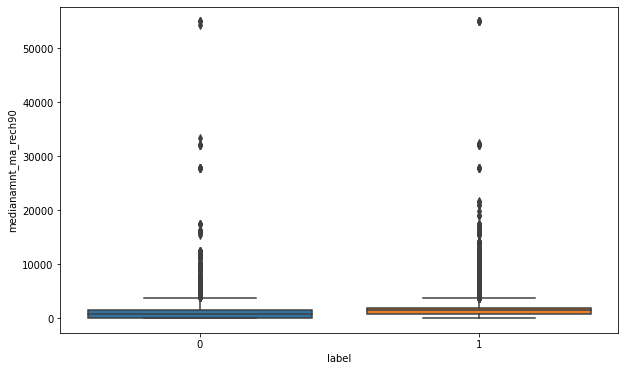

In [78]:
plt.figure(figsize=(10,6))
sns.boxplot(y="medianamnt_ma_rech90", x="label", data=data)
plt.show()

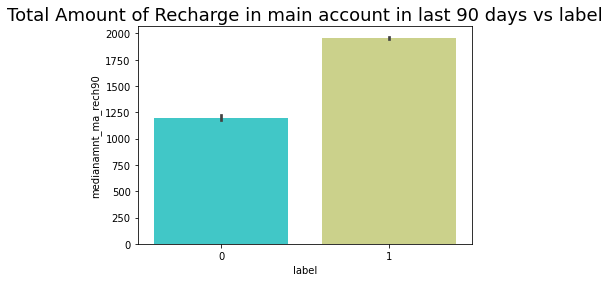

,mean,max,min,count,std
label,,,,,
0,1198.435135,55000.0,0.0,26162,1971.178914
1,1959.607547,55000.0,0.0,183431,2079.656203


In [79]:
sns.barplot(x="label",y="medianamnt_ma_rech90", data=data, palette="rainbow")
plt.title("Total Amount of Recharge in main account in last 90 days vs label", fontsize=18)
plt.show()
data.groupby("label")["medianamnt_ma_rech90"].aggregate(["mean", max, min, "count", "std"])

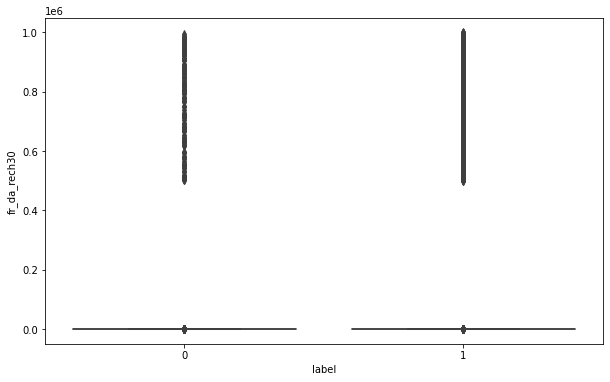

In [81]:
plt.figure(figsize=(10,6))
sns.boxplot(y="fr_da_rech30", x="label", data=data)
plt.show()

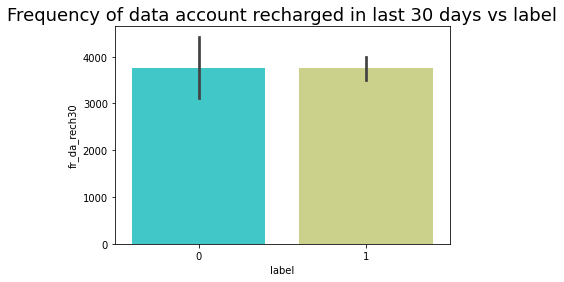

,mean,max,min,count,std
label,,,,,
0,3753.278511,994935.856899,0.0,26162,54333.669189
1,3748.954741,999809.240107,0.0,183431,53821.327284


In [82]:
sns.barplot(x="label",y="fr_da_rech30", data=data, palette="rainbow")
plt.title("Frequency of data account recharged in last 30 days vs label", fontsize=18)
plt.show()
data.groupby("label")["fr_da_rech30"].aggregate(["mean", max, min, "count", "std"])

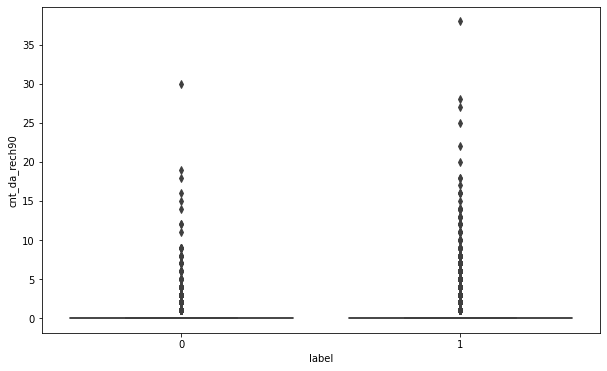

In [84]:
plt.figure(figsize=(10,6))
sns.boxplot(y="cnt_da_rech90", x="label", data=data)
plt.show()

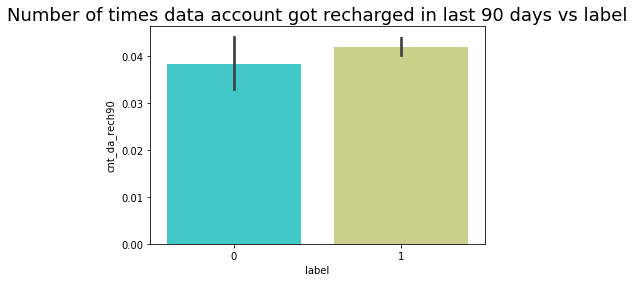

,mean,max,min,count,std
label,,,,,
0,0.038338,30,0,26162,0.454435
1,0.041945,38,0,183431,0.388765


In [85]:
sns.barplot(x="label",y="cnt_da_rech90", data=data, palette="rainbow")
plt.title("Number of times data account got recharged in last 90 days vs label", fontsize=18)
plt.show()
data.groupby("label")["cnt_da_rech90"].aggregate(["mean", max, min, "count", "std"])

In [86]:
data["cnt_da_rech90"].describe()

count    209593.000000
mean          0.041495
std           0.397556
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          38.000000
Name: cnt_da_rech90, dtype: float64

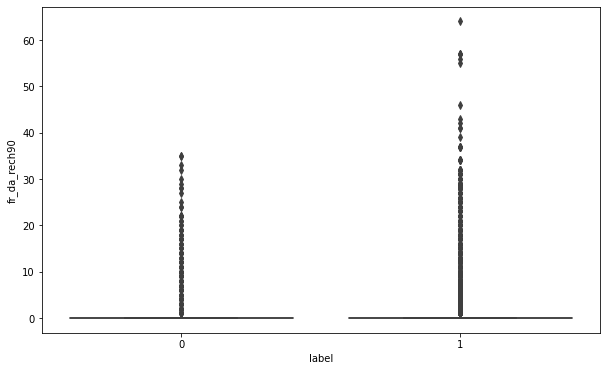

In [88]:
plt.figure(figsize=(10,6))
sns.boxplot(y="fr_da_rech90", x="label", data=data)
plt.show()

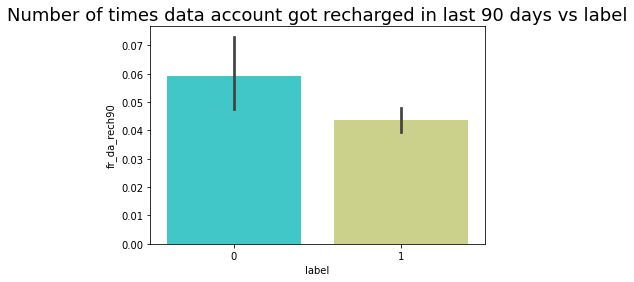

,mean,max,min,count,std
label,,,,,
0,0.059361,35,0,26162,1.000684
1,0.043766,64,0,183431,0.944132


In [89]:
sns.barplot(x="label",y="fr_da_rech90", data=data, palette="rainbow")
plt.title("Number of times data account got recharged in last 90 days vs label", fontsize=18)
plt.show()
data.groupby("label")["fr_da_rech90"].aggregate(["mean", max, min, "count", "std"])

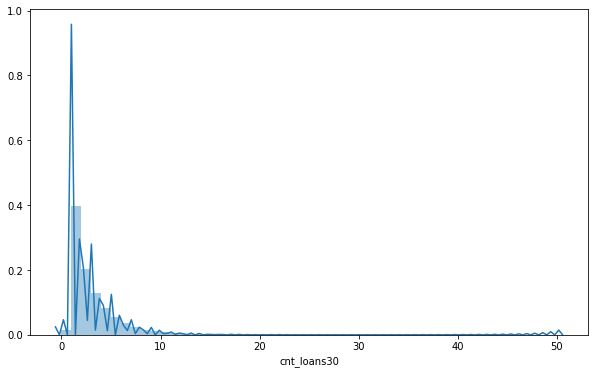

In [91]:
plt.figure(figsize=(10,6))
sns.distplot(a=data["cnt_loans30"])
plt.show()

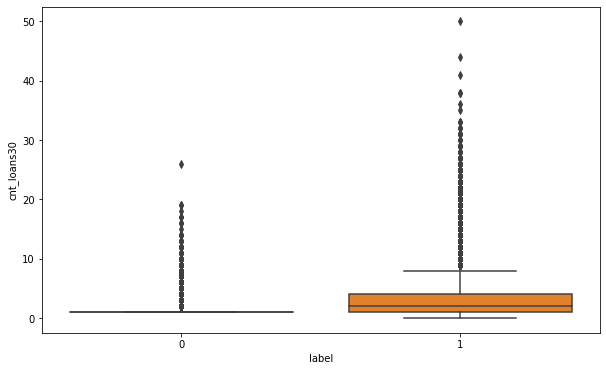

In [92]:
plt.figure(figsize=(10,6))
sns.boxplot(y="cnt_loans30", x="label", data=data)
plt.show()

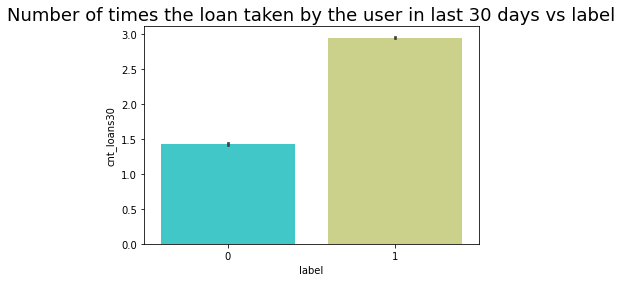

,mean,max,min,count,std
label,,,,,
0,1.431313,26,1,26162,1.100109
1,2.948340,50,0,183431,2.645055


In [93]:
sns.barplot(x="label",y="cnt_loans30", data=data, palette="rainbow")
plt.title("Number of times the loan taken by the user in last 30 days vs label", fontsize=18)
plt.show()
data.groupby("label")["cnt_loans30"].aggregate(["mean", max, min, "count", "std"])

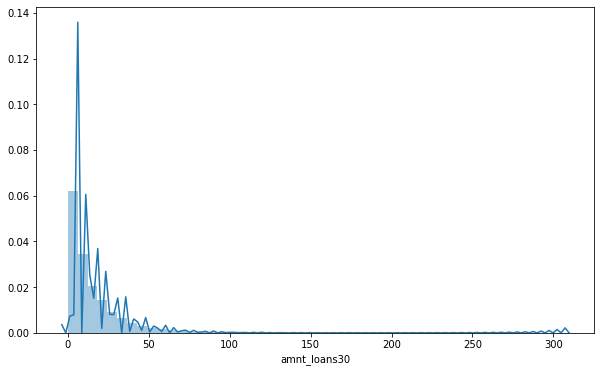

In [96]:
plt.figure(figsize=(10,6))
sns.distplot(a=data["amnt_loans30"])
plt.show()

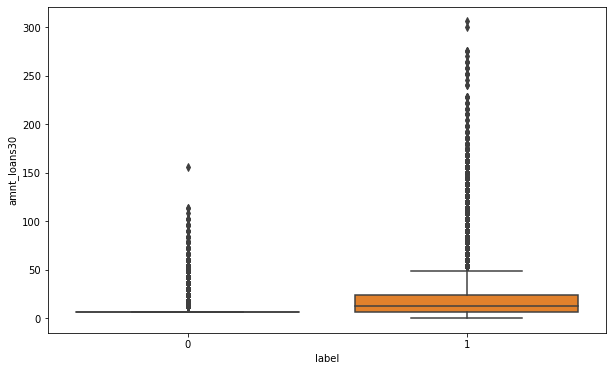

In [97]:
plt.figure(figsize=(10,6))
sns.boxplot(y="amnt_loans30", x="label", data=data)
plt.show()

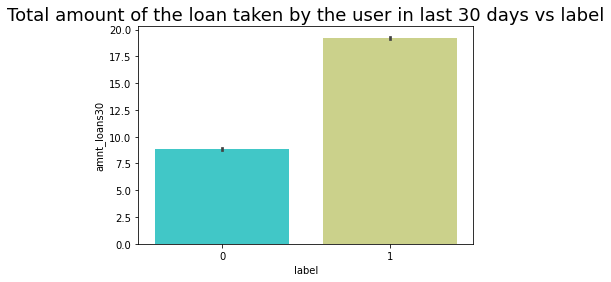

,mean,max,min,count,std
label,,,,,
0,8.873634,156,6,26162,7.213658
1,19.246834,306,0,183431,18.007875


In [98]:
sns.barplot(x="label",y="amnt_loans30", data=data, palette="rainbow")
plt.title("Total amount of the loan taken by the user in last 30 days vs label", fontsize=18)
plt.show()
data.groupby("label")["amnt_loans30"].aggregate(["mean", max, min, "count", "std"])

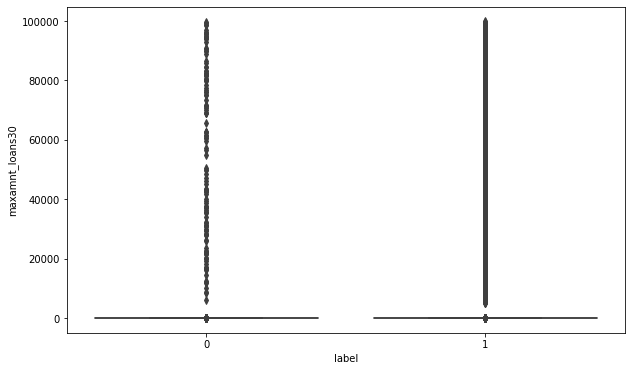

In [100]:
plt.figure(figsize=(10,6))
sns.boxplot(y="maxamnt_loans30", x="label", data=data)
plt.show()

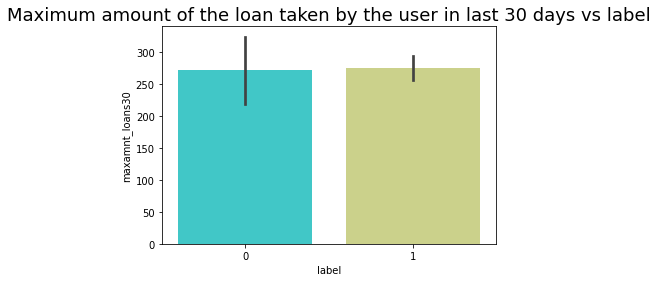

,mean,max,min,count,std
label,,,,,
0,271.873754,99571.106262,6.0,26162,4258.032852
1,275.055959,99864.560864,0.0,183431,4243.451929


In [101]:
sns.barplot(x="label",y="maxamnt_loans30", data=data, palette="rainbow")
plt.title("Maximum amount of the loan taken by the user in last 30 days vs label", fontsize=18)
plt.show()
data.groupby("label")["maxamnt_loans30"].aggregate(["mean", max, min, "count", "std"])

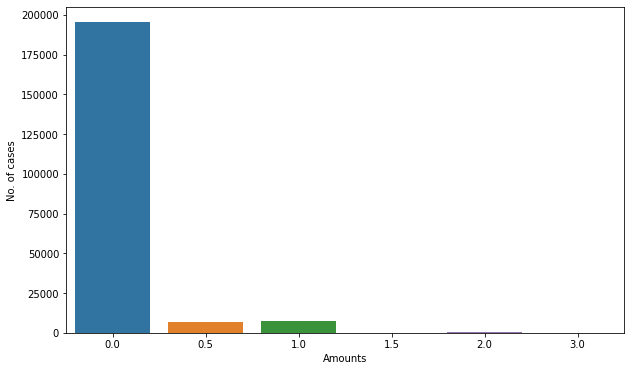

In [105]:
plt.figure(figsize=(10,6))
sns.countplot(x="medianamnt_loans30", data=data)
plt.ylabel("No. of cases")
plt.xlabel("Amounts")
plt.show()

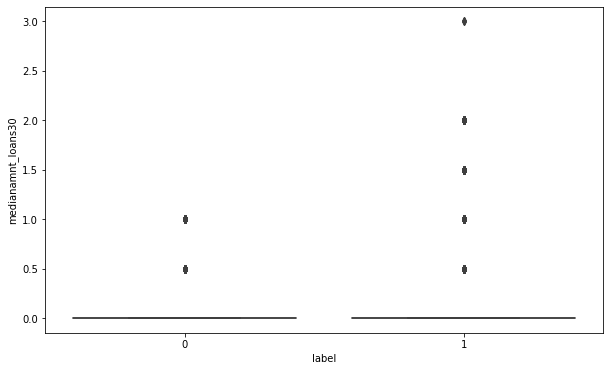

In [106]:
plt.figure(figsize=(10,6))
sns.boxplot(y="medianamnt_loans30", x="label", data=data)
plt.show()

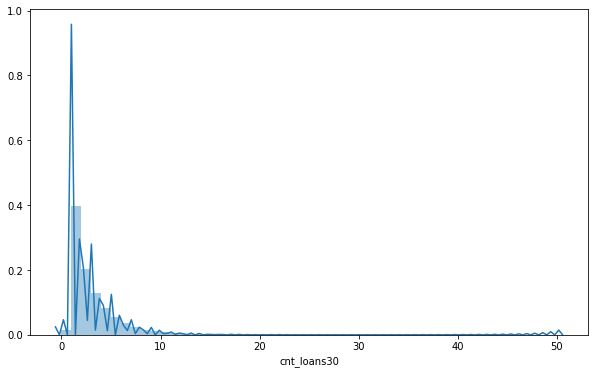

In [108]:
plt.figure(figsize=(10,6))
sns.distplot(a=data["cnt_loans30"])
plt.show()

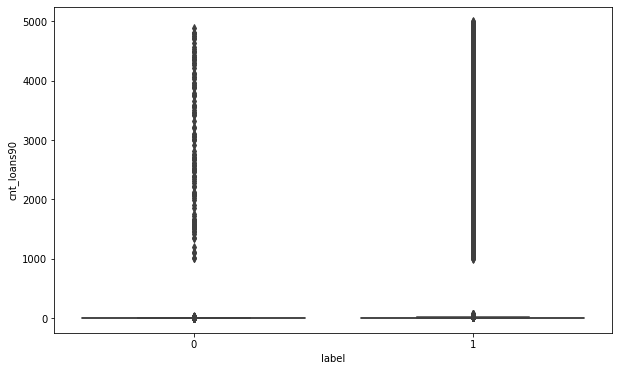

In [109]:
plt.figure(figsize=(10,6))
sns.boxplot(y="cnt_loans90", x="label", data=data)
plt.show()

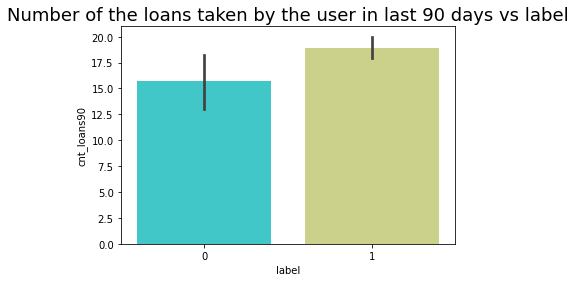

,mean,max,min,count,std
label,,,,,
0,15.703549,4894.101713,1.0,26162,219.017386
1,18.922749,4997.517944,0.0,183431,225.607456


In [110]:
sns.barplot(x="label",y="cnt_loans90", data=data, palette="rainbow")
plt.title("Number of the loans taken by the user in last 90 days vs label", fontsize=18)
plt.show()
data.groupby("label")["cnt_loans90"].aggregate(["mean", max, min, "count", "std"])

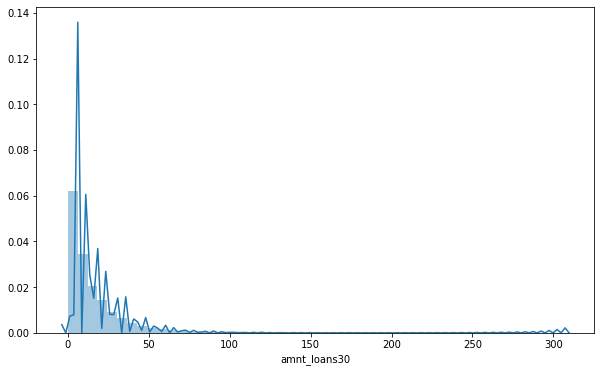

In [113]:
plt.figure(figsize=(10,6))
sns.distplot(a=data["amnt_loans30"])
plt.show()

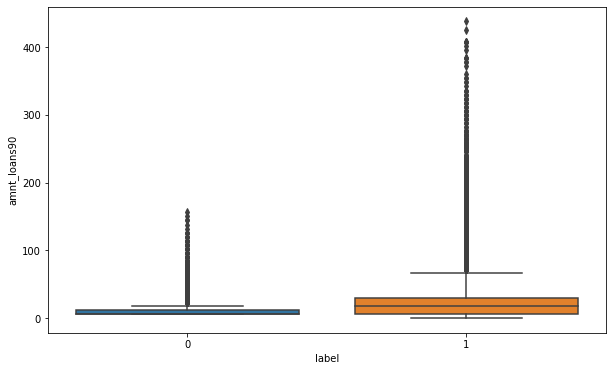

In [114]:
plt.figure(figsize=(10,6))
sns.boxplot(y="amnt_loans90", x="label", data=data)
plt.show()

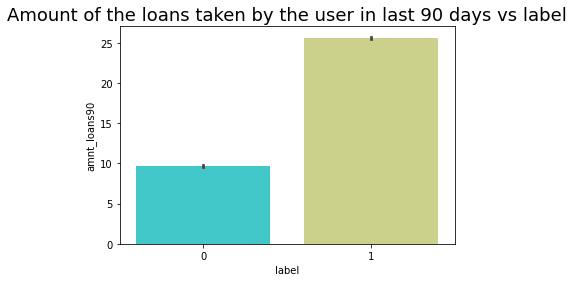

,mean,max,min,count,std
label,,,,,
0,9.642382,156,6,26162,8.976451
1,25.642590,438,0,183431,27.516137


In [115]:
sns.barplot(x="label",y="amnt_loans90", data=data, palette="rainbow")
plt.title("Amount of the loans taken by the user in last 90 days vs label", fontsize=18)
plt.show()
data.groupby("label")["amnt_loans90"].aggregate(["mean", max, min, "count", "std"])

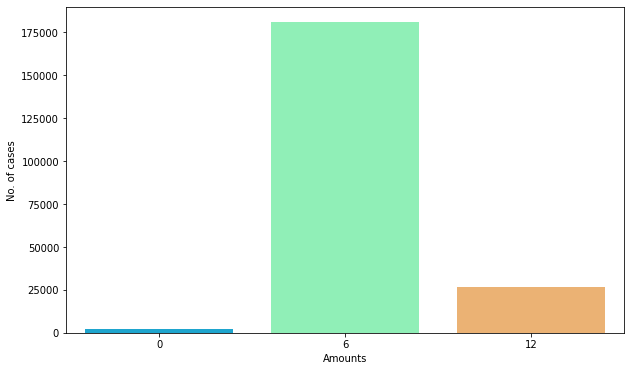

In [118]:
plt.figure(figsize=(10,6))
sns.countplot(x="maxamnt_loans90", data=data, palette="rainbow")
plt.xlabel("Amounts")
plt.ylabel("No. of cases")
plt.show()

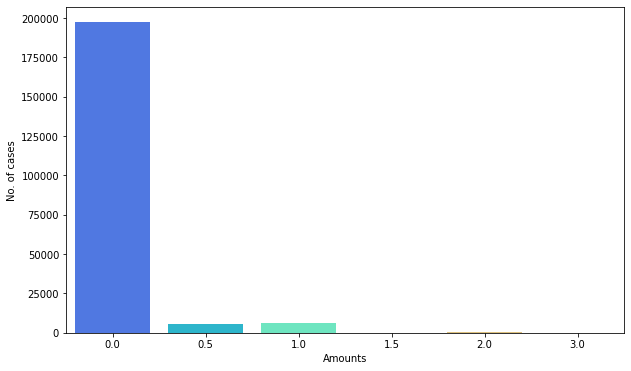

In [120]:
plt.figure(figsize=(10,6))
sns.countplot(x="medianamnt_loans90", data=data, palette="rainbow")
plt.xlabel("Amounts")
plt.ylabel("No. of cases")
plt.show()

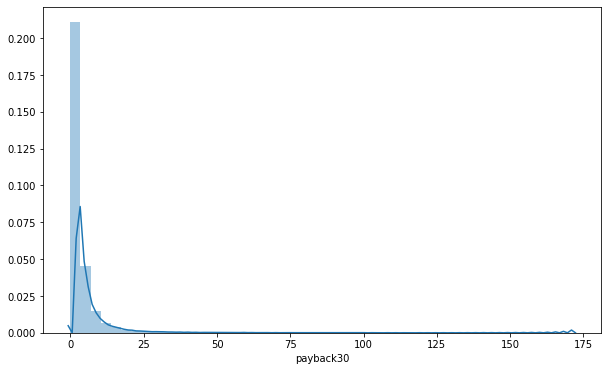

In [123]:
plt.figure(figsize=(10,6))
sns.distplot(a=data["payback30"])
plt.show()

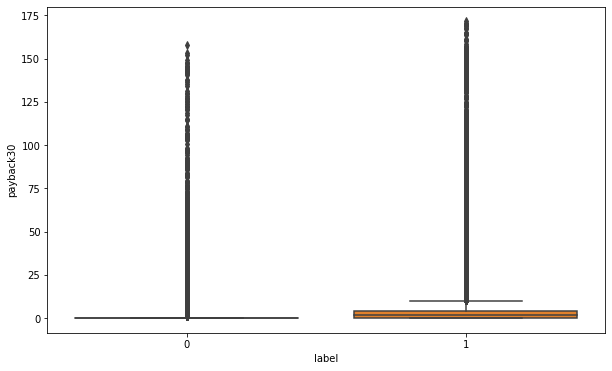

In [124]:
plt.figure(figsize=(10,6))
sns.boxplot(y="payback30", x="label", data=data)
plt.show()

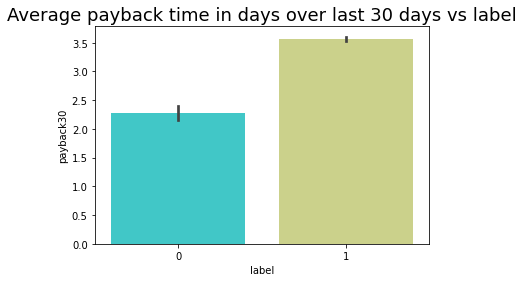

,mean,max,min,count,std
label,,,,,
0,2.270777,158.0,0.0,26162,9.913831
1,3.559715,171.5,0.0,183431,8.633455


In [125]:
sns.barplot(x="label",y="payback30", data=data, palette="rainbow")
plt.title("Average payback time in days over last 30 days vs label", fontsize=18)
plt.show()
data.groupby("label")["payback30"].aggregate(["mean", max, min, "count", "std"])

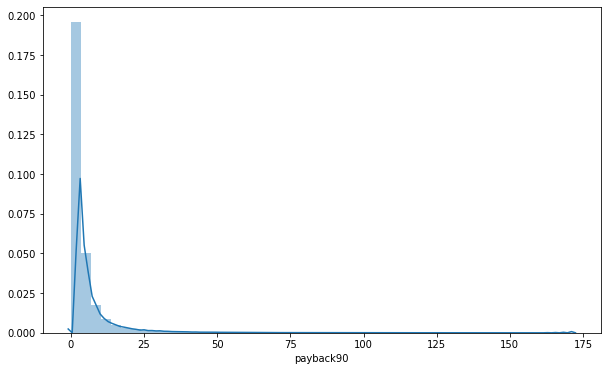

In [127]:
plt.figure(figsize=(10,6))
sns.distplot(a=data["payback90"])
plt.show()

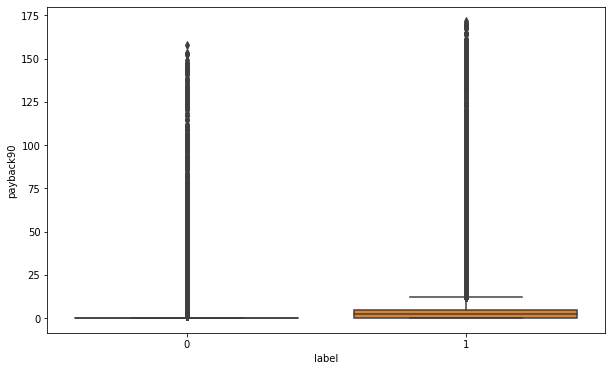

In [128]:
plt.figure(figsize=(10,6))
sns.boxplot(y="payback90", x="label", data=data)
plt.show()

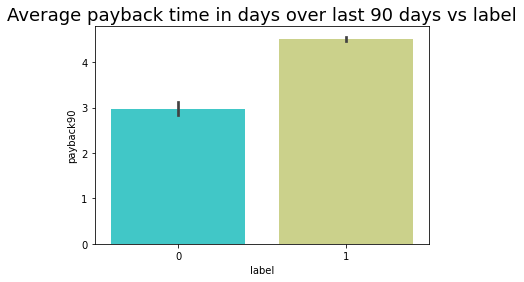

,mean,max,min,count,std
label,,,,,
0,2.979047,158.0,0.0,26162,11.459450
1,4.512952,171.5,0.0,183431,10.118775


In [129]:
sns.barplot(x="label",y="payback90", data=data, palette="rainbow")
plt.title("Average payback time in days over last 90 days vs label", fontsize=18)
plt.show()
data.groupby("label")["payback90"].aggregate(["mean", max, min, "count", "std"])

In [16]:
data["fr_da_rech30"]=data['fr_da_rech30'].apply(lambda x:20 if x>20 else x)

In [17]:
#as few features have some very unrealistic values, we will winsorize those features to avoid very loss of data during removing outliers because data is expensive
features=['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_loans90','payback30', 'payback90']

In [18]:
from scipy.stats.mstats import winsorize
def percentile_capping(df, cols, from_low_end, from_high_end):
    for col in cols:
        winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)

In [19]:
data_copy=data.copy()

In [20]:
percentile_capping(data_copy, features,0,.01)

In [21]:
data_copy.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,673.138831,5213.106513,5877.369697,2642.512317,3414.414127,6.441312,1.097198,2037.498714,3.918513,...,2.758981,17.952021,274.658747,0.054029,3.757964,23.645398,6.703134,0.046077,3.076829,4.005902
std,0.330519,526.389187,8118.954947,9527.495471,3786.911536,5089.682494,9.695832,6.913428,2187.036553,3.888083,...,2.554502,17.379741,4245.264648,0.218039,4.044626,26.469861,2.103864,0.200692,5.903304,7.667297
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.453000,42.693333,299.700000,330.000000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1095.750000,1347.220000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3362.350000,4204.510000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,2421.000000,41747.000000,49974.210000,19470.240000,26998.750000,57.000000,56.000000,10000.000000,20.000000,...,50.000000,306.000000,99864.560864,3.000000,23.000000,438.000000,12.000000,3.000000,38.666667,50.000000


In [22]:
data_copy.shape

(209593, 33)

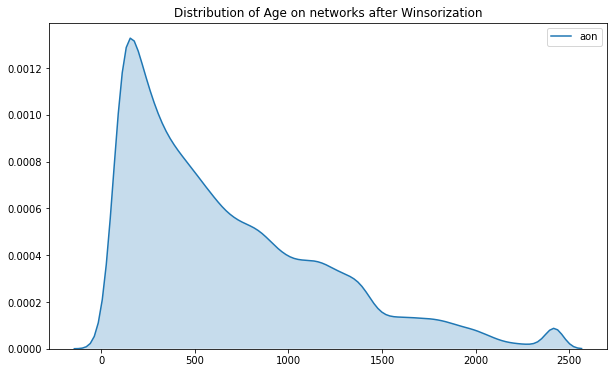

Observation: the datapoints of 'aon' feature is rightly skewed, distribution of data is not normal.


In [23]:
plt.figure(figsize=(10,6))
sns.kdeplot(data_copy["aon"], shade=True)
plt.title("Distribution of Age on networks after Winsorization")
plt.savefig("aon_after2.png")
plt.show()
print("Observation: the datapoints of 'aon' feature is rightly skewed, distribution of data is not normal.")

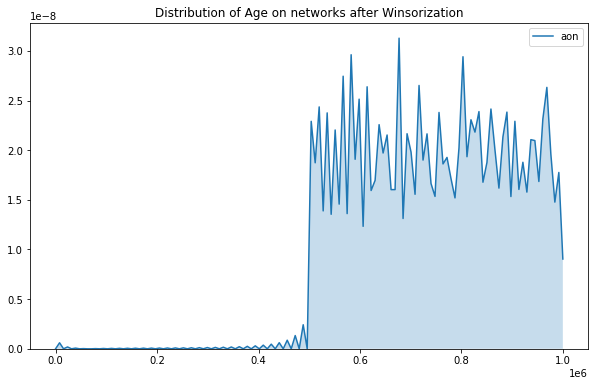

Observation: the datapoints of 'aon' feature is rightly skewed, distribution of data is not normal.


In [32]:
plt.figure(figsize=(10,6))
sns.kdeplot(data["aon"], shade=True)
plt.title("Distribution of Age on networks after Winsorization")
plt.savefig("aon_raw.png")
plt.show()
print("Observation: the datapoints of 'aon' feature is rightly skewed, distribution of data is not normal.")

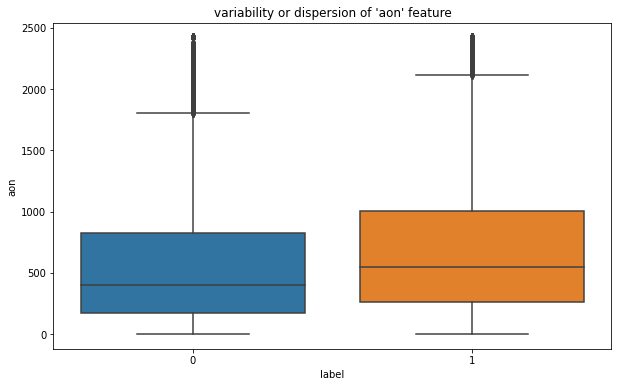

Observation: 
                    -After winsorization of data Range of 'aon' datapoints of each label (0 & 1) is 2420.
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: from the length of whiskers or legs at two ends, we san state that data from minimum value to 1st quartile has very high concentration and less variability than data from quartile 3 to maximum.it also means the data is rightly or positively skewed.
                    -For label 1: from the length of whiskers or legs at two ends, we san state thatdata from minimum value to 1st quartile has very high concentration and less variability than data from quartile 3 to maximum.it also means the data is rightly or positively skewed.
                    -Also we can say median of label 1 (545) is greater than label 0(399) 
                    -Also from higher standard deviation of label 1,

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(y="aon", x="label", data=data_copy)
plt.title("variability or dispersion of 'aon' feature")
plt.savefig("box_aon_after")
plt.show()
data_copy.groupby("label")["aon"].aggregate(["mean", "median", max, min, "count", "std"])
print("""Observation: 
                    -After winsorization of data Range of 'aon' datapoints of each label (0 & 1) is 2420.
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: from the length of whiskers or legs at two ends, we san state that data from minimum value to 1st quartile has very high concentration and less variability than data from quartile 3 to maximum.it also means the data is rightly or positively skewed.
                    -For label 1: from the length of whiskers or legs at two ends, we san state thatdata from minimum value to 1st quartile has very high concentration and less variability than data from quartile 3 to maximum.it also means the data is rightly or positively skewed.
                    -Also we can say median of label 1 (545) is greater than label 0(399) 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.""")

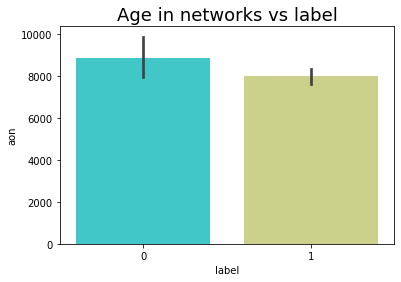

,mean,max,min,count,std
label,,,,,
0,571.725518,2421.0,1.0,26162,513.872776
1,687.602990,2421.0,1.0,183431,526.562422


In [37]:
sns.barplot(x="label",y="aon", data=data, palette="rainbow")
plt.title("Age in networks vs label", fontsize=18)
plt.savefig("bar_aon.png")
plt.show()
data_copy.groupby("label")["aon"].aggregate(["mean", max, min, "count", "std"])

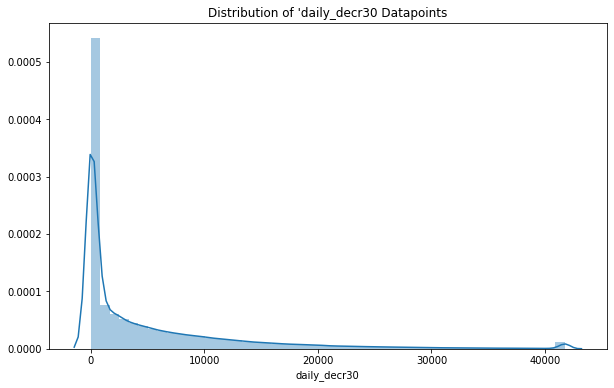

Observation: the distribution of data is rightly skewed and outliers present.


In [219]:
plt.figure(figsize=(10,6))
sns.distplot(a=data_copy["daily_decr30"])
plt.title("Distribution of 'daily_decr30 Datapoints")
plt.savefig("daily_decr30_after.png")
plt.show()    
print("Observation: the distribution of data is rightly skewed and outliers present.")

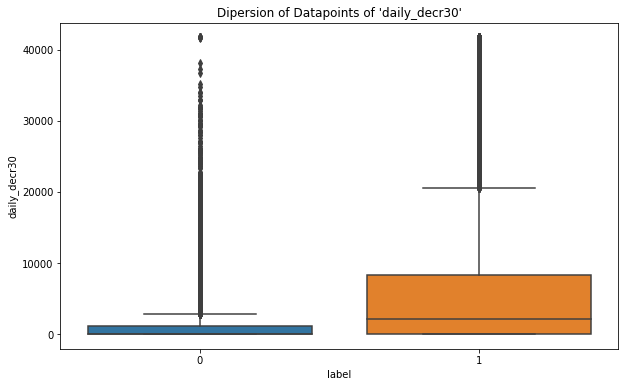

Observation: 
                    -After winsorization of data, Range of 'daily_decr30' datapoints of each label (0 & 1) is 41747.
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: Same as label 0 , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mea

In [78]:
plt.figure(figsize=(10,6))
sns.boxplot(y="daily_decr30", x="label", data=data_copy)
plt.title("Dipersion of Datapoints of 'daily_decr30'")
plt.savefig("decr30_after")
plt.show()
data_copy.groupby("label")["daily_decr30"].aggregate(["mean", "median", max, min, "count", "std"])
print("""Observation: 
                    -After winsorization of data, Range of 'daily_decr30' datapoints of each label (0 & 1) is 41747.
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: Same as label 0 , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.""")

In [79]:
m=data_copy["daily_decr30"].max()
q95=data_copy["daily_decr30"].quantile(.95)

In [80]:
data_copy["daily_decr30"]=data_copy["daily_decr30"].apply(lambda x:q95 if x>q95 else x)

In [82]:
data_copy.groupby("label")["daily_decr30"].aggregate(["mean", "median", max, min, "count", "std"])

,mean,median,max,min,count,std
label,,,,,,
0,1238.640863,33.4475,22577.5,0.0,26162,2764.276575
1,5253.031263,2127.6950,22577.5,0.0,183431,6797.233953


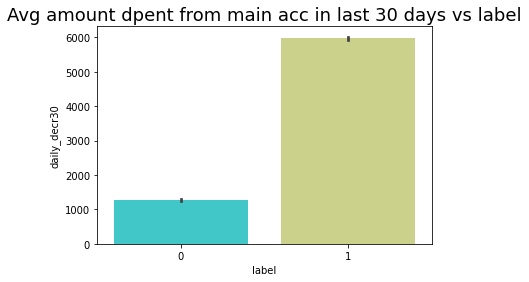

In [83]:
sns.barplot(x="label",y="daily_decr30", data=data, palette="rainbow")
plt.title("Avg amount dpent from main acc in last 30 days vs label", fontsize=18)
plt.savefig("bar_daily_decr30.png")
plt.show()

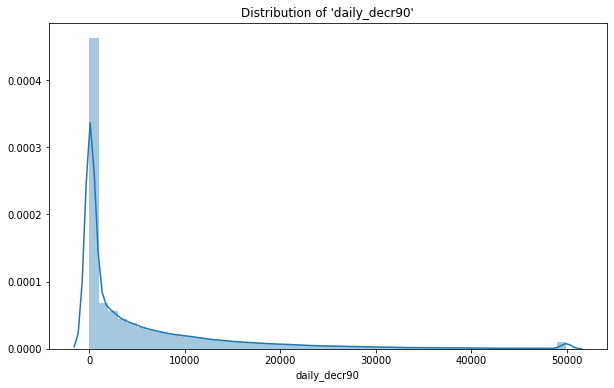

Observation: Right tail is present so rightly skewed or postively skewed data.


In [84]:
plt.figure(figsize=(10,6))
sns.distplot(a=data_copy["daily_decr90"])
plt.title("Distribution of 'daily_decr90'")
plt.savefig("decr90_after")
plt.show()
print("Observation: Right tail is present so rightly skewed or postively skewed data.")

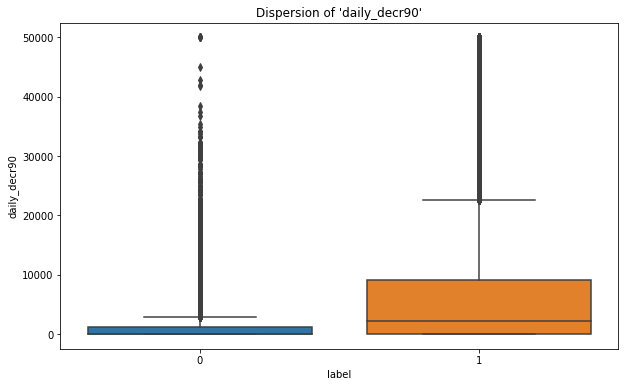

Observation: 
                    -After winsorization of data, Range of 'daily_decr90' datapoints of each label (0 & 1) is 49974.21
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: Same as label 0 , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than m

In [97]:
plt.figure(figsize=(10,6))
sns.boxplot(y="daily_decr90", x="label", data=data_copy)
plt.title("Dispersion of 'daily_decr90'")
plt.savefig("decr90_box_after")
plt.show()
data_copy.groupby("label")["daily_decr90"].aggregate(["mean",max, min,"count","std"])
print("""Observation: 
                    -After winsorization of data, Range of 'daily_decr90' datapoints of each label (0 & 1) is 49974.21
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: Same as label 0 , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.""")

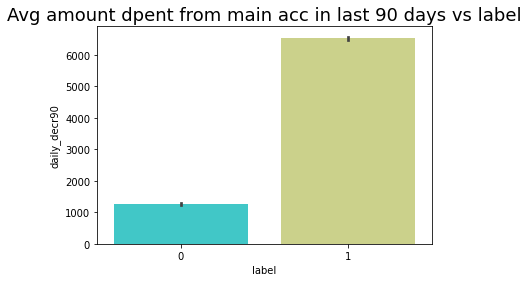

In [98]:
sns.barplot(x="label",y="daily_decr90", data=data_copy, palette="rainbow")
plt.title("Avg amount dpent from main acc in last 90 days vs label", fontsize=18)
plt.savefig("bar_daily_decr90.png")
plt.show()

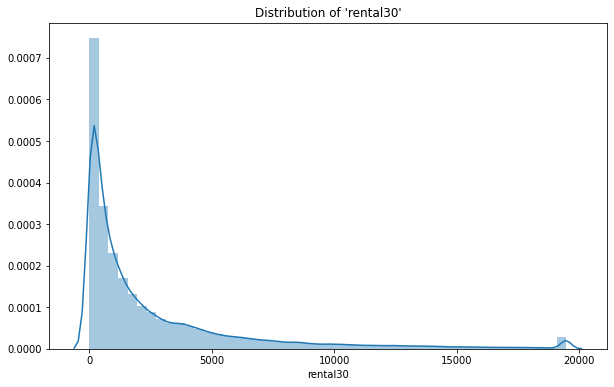

Observation: the distribution of data is rightly skewed and outliers present.


In [99]:
plt.figure(figsize=(10,6))
sns.distplot(a=data_copy["rental30"])
plt.title("Distribution of 'rental30'")
plt.savefig("dist_rent30_aft.png")
plt.show()    
print("Observation: the distribution of data is rightly skewed and outliers present.")

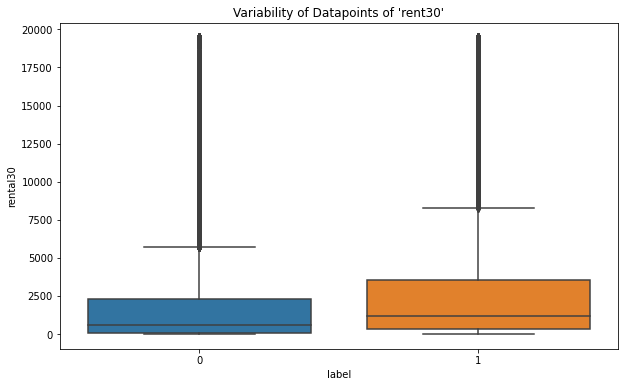

Observation: 
                    -After winsorization of data, Range of 'rental30' datapoints of each label (0 & 1) is 19470 indonesian rupees.
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 i.e. 1164.51 irs is slightly greater than label 0 i.e. 607 irs. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are

In [102]:
plt.figure(figsize=(10,6))
sns.boxplot(y="rental30", x="label", data=data_copy)
plt.title("Variability of Datapoints of 'rent30'")
plt.savefig("box_rent30_aft.png")
plt.show()
data_copy.groupby("label")["rental30"].aggregate(["mean", "std", "max", "min", "count", "median"])
print("""Observation: 
                    -After winsorization of data, Range of 'rental30' datapoints of each label (0 & 1) is 19470 indonesian rupees.
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 i.e. 1164.51 irs is slightly greater than label 0 i.e. 607 irs. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.""")

In [103]:
q95=data_copy["rental30"].quantile(.95)
data_copy["rental30"]=data_copy["rental30"].apply(lambda x:q95 if x>q95 else x)

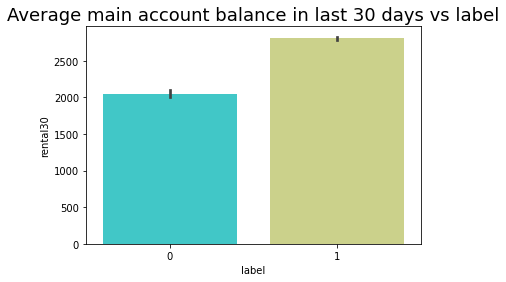

In [104]:
sns.barplot(x="label",y="rental30", data=data, palette="rainbow")
plt.title("Average main account balance in last 30 days vs label", fontsize=18)
plt.savefig("bar_rental30.png")
plt.show()

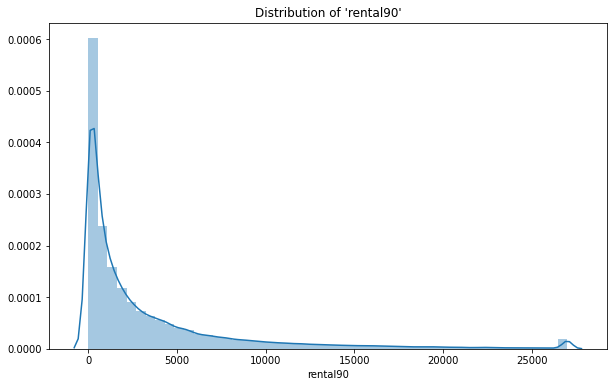

Observation: the distribution of data is rightly skewed and outliers present.


In [175]:
plt.figure(figsize=(10,6))
sns.distplot(a=data_copy["rental90"])
plt.title("Distribution of 'rental90'")
plt.savefig("dist_rent90_aft.png")
plt.show()    
print("Observation: the distribution of data is rightly skewed and outliers present.")

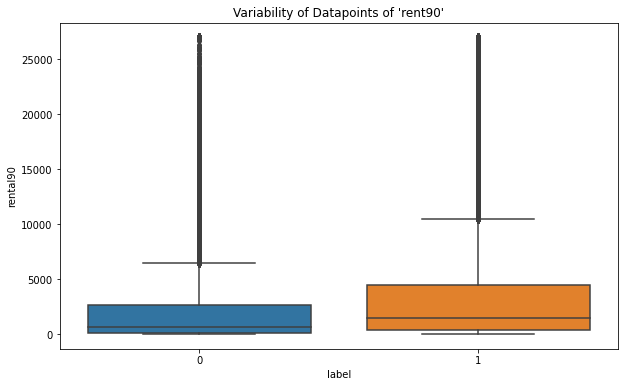

Observation: 
                    -After winsorization of data, Range of 'retal90' datapoints of each label (0 & 1) is 26998 irs .
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard

In [110]:
plt.figure(figsize=(10,6))
sns.boxplot(y="rental90", x="label", data=data_copy)
plt.title("Variability of Datapoints of 'rent90'")
plt.savefig("box_rent90_aft.png")
plt.show()
data_copy.groupby("label")["rental90"].aggregate(["mean", max, min, "count", "std", "median"])
print("""Observation: 
                    -After winsorization of data, Range of 'retal90' datapoints of each label (0 & 1) is 26998 irs .
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.""")

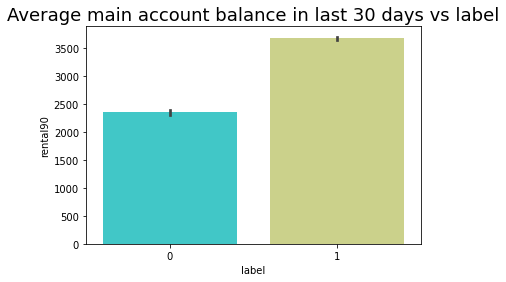

In [111]:
sns.barplot(x="label",y="rental90", data=data, palette="rainbow")
plt.title("Average main account balance in last 30 days vs label", fontsize=18)
plt.savefig("bar_rental90.png")
plt.show()

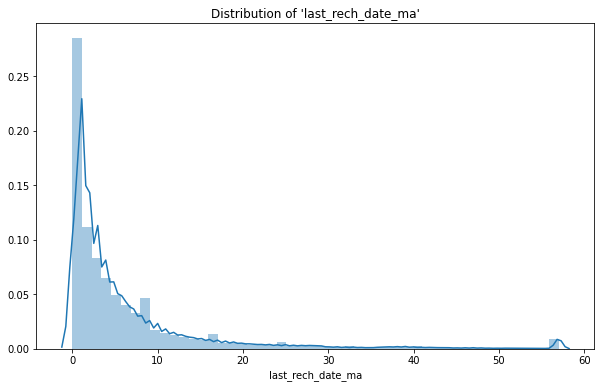

Observation: the distribution of data is rightly skewed and outliers present.


In [185]:
plt.figure(figsize=(10,6))
sns.distplot(data_copy["last_rech_date_ma"])
plt.title("Distribution of 'last_rech_date_ma'")
plt.savefig("dist_last_rech_date_ma_aft.png")
plt.show()    
print("Observation: the distribution of data is rightly skewed and outliers present.")

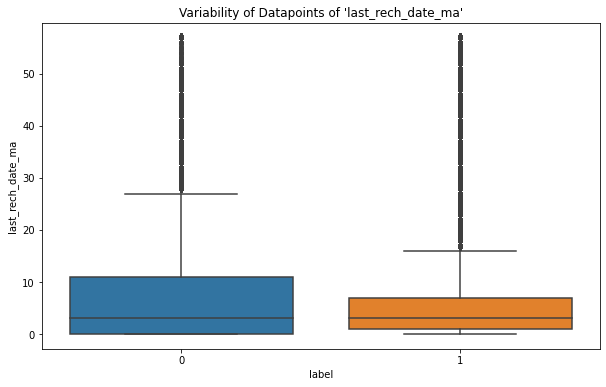

Observation: 
                    -After winsorization of data, Range of 'last-rech_date_ma' datapoints of each label (0 & 1) is 57 days .
                    -As we can see box of label 0 has more length than label 1, we can say 50% of the data of label 0 has more variability than of label 1.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 and label 0 is same that is 3 days.
                    -Also from higher standard deviation of label 0, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
              

,mean,max,min,count,std,median
label,,,,,,
0,8.419234,57.0,0.0,26162,12.990456,3.0
1,6.159210,57.0,0.0,183431,9.094625,3.0


In [114]:
plt.figure(figsize=(10,6))
sns.boxplot(y="last_rech_date_ma", x="label", data=data_copy)
plt.title("Variability of Datapoints of 'last_rech_date_ma'")
plt.savefig("box_last_rech_date_ma_after.png")
plt.show()
print("""Observation: 
                    -After winsorization of data, Range of 'last-rech_date_ma' datapoints of each label (0 & 1) is 57 days .
                    -As we can see box of label 0 has more length than label 1, we can say 50% of the data of label 0 has more variability than of label 1.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 and label 0 is same that is 3 days.
                    -Also from higher standard deviation of label 0, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.""")
data_copy.groupby("label")["last_rech_date_ma"].aggregate(["mean", max, min, "count", "std", "median"])

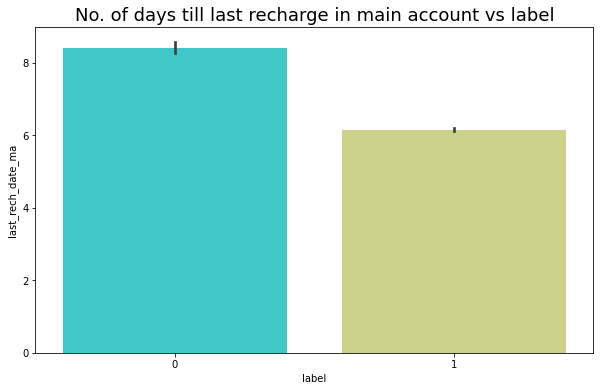

,mean,max,min,count,std
label,,,,,
0,8.419234,57.0,0.0,26162,12.990456
1,6.159210,57.0,0.0,183431,9.094625


In [133]:
plt.figure(figsize=(10,6))
sns.barplot(x="label",y="last_rech_date_ma", data=data_copy, palette="rainbow")
plt.title("No. of days till last recharge in main account vs label", fontsize=18)
plt.savefig("bar_last_rech_da_ma_after.png")
plt.show()

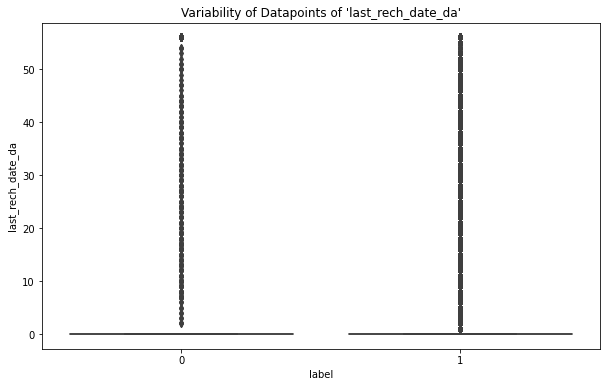

Observation: 
                    -After winsorization of data, Range of 'last-rech_date_da' datapoints of each label (0 & 1) is 56 days .
                    -As we can see no box is visible so data is not continuous.
                    -Outliers present.


,mean,max,min,count,std
label,,,,,
0,0.707056,56.0,0.0,26162,5.388407
1,1.152842,56.0,0.0,183431,7.102577


In [118]:
plt.figure(figsize=(10,6))
sns.boxplot(y="last_rech_date_da", x="label", data=data_copy)
plt.title("Variability of Datapoints of 'last_rech_date_da'")
plt.savefig("box_last_rech_date_da_after.png")
plt.show()
print("""Observation: 
                    -After winsorization of data, Range of 'last-rech_date_da' datapoints of each label (0 & 1) is 56 days .
                    -As we can see no box is visible so data is not continuous.
                    -Outliers present.""")
data_copy.groupby("label")["last_rech_date_da"].aggregate(["mean", max, min, "count", "std"])

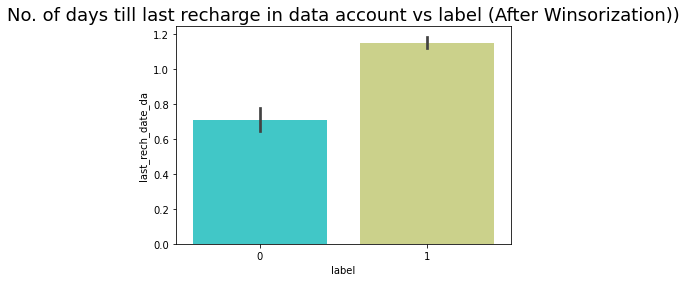

,mean,max,min,count,std
label,,,,,
0,0.707056,56.0,0.0,26162,5.388407
1,1.152842,56.0,0.0,183431,7.102577


In [134]:
sns.barplot(x="label",y="last_rech_date_da", data=data_copy, palette="rainbow")
plt.title("No. of days till last recharge in data account vs label (After Winsorization))", fontsize=18)
plt.savefig("bar_last_rech_date_da_after.png")
plt.show()
data_copy.groupby("label")["last_rech_date_da"].aggregate(["mean", max, min, "count", "std"])

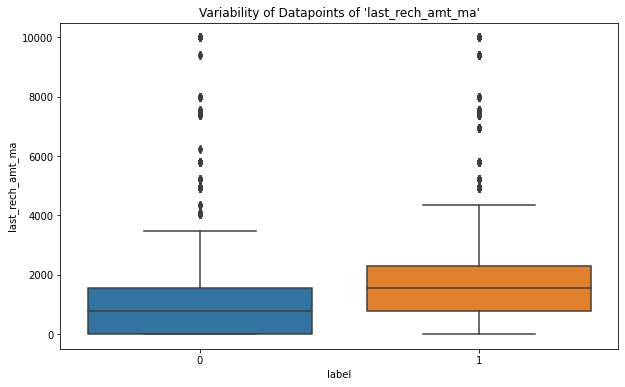

Observation: 
                    -After winsorization of data, Range of 'last-rech_amt_ma' datapoints of each label (0 & 1) is 10000 irs .
                    -As we can see box of label 0 has more length than label 1, we can say 50% of the data of label 0 has more variability than of label 1.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 that is 1539 is gtreater than of label 0.
                    -Also from higher standard deviation of label 0, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
       

,mean,max,min,count,std,median
label,,,,,,
0,1207.185460,10000,0,26162,1718.521034,770
1,2155.922837,10000,0,183431,2220.759151,1539


In [123]:
plt.figure(figsize=(10,6))
sns.boxplot(y="last_rech_amt_ma", x="label", data=data_copy)
plt.title("Variability of Datapoints of 'last_rech_amt_ma'")
plt.savefig("box_last_rech_amt_ma_after.png")
plt.show()
print("""Observation: 
                    -After winsorization of data, Range of 'last-rech_amt_ma' datapoints of each label (0 & 1) is 10000 irs .
                    -As we can see box of label 0 has more length than label 1, we can say 50% of the data of label 0 has more variability than of label 1.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 that is 1539 is gtreater than of label 0.
                    -Also from higher standard deviation of label 0, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.""")
data_copy.groupby("label")["last_rech_amt_ma"].aggregate(["mean", max, min, "count", "std", "median"])

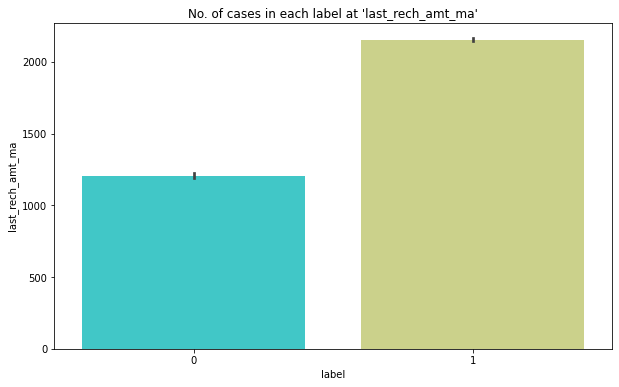

Observation: Avg amount last recharged for non defaulter customer is 2155.91 ir where for defaulters the amount is 1207.18


In [135]:
plt.figure(figsize=(10,6))
sns.barplot(x="label",y="last_rech_amt_ma", data=data_copy, palette="rainbow")
plt.title("No. of days till last recharge in main account vs label", fontsize=18)
plt.title("No. of cases in each label at 'last_rech_amt_ma'")
plt.savefig("bar_last_rech_amt_ma_after.png")
plt.show()
data_copy.groupby("label")["last_rech_amt_ma"].aggregate(["mean", max, min, "count", "std"])
print("Observation: Avg amount last recharged for non defaulter customer is 2155.91 ir where for defaulters the amount is 1207.18")

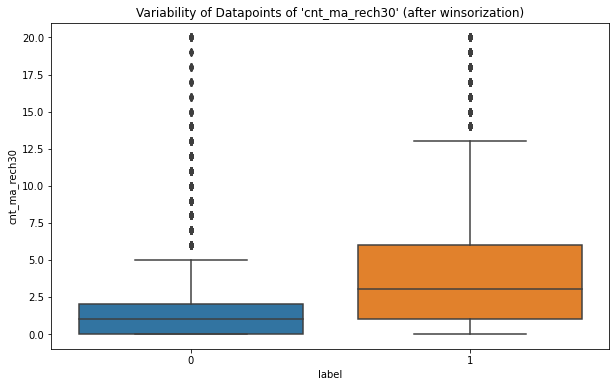

Observation: 
                    -After winsorization of data, Range of 'cnt_ma_rech30' datapoints of each label (0 & 1) is 20 days .
                    -As we can see box of label 0 has more length than label 1, we can say 50% of the data of label 0 has more variability than of label 1.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 that is 3 greater than that of label 0.
                    -Also from higher standard deviation of label 0, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
              

,mean,max,min,count,std,median
label,,,,,,
0,1.299595,20,0,26162,1.975324,1
1,4.292039,20,0,183431,3.949563,3


In [124]:
plt.figure(figsize=(10,6))
sns.boxplot(y="cnt_ma_rech30", x="label", data=data_copy)
plt.title("Variability of Datapoints of 'cnt_ma_rech30' (after winsorization)")
plt.savefig("box_cnt_ma_rech30_after.png")
plt.show()
print("""Observation: 
                    -After winsorization of data, Range of 'cnt-ma_rech30' datapoints of each label (0 & 1) is 20 times .
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.""")
data_copy.groupby("label")["cnt_ma_rech30"].aggregate(["mean", max, min, "count", "std", "median"])

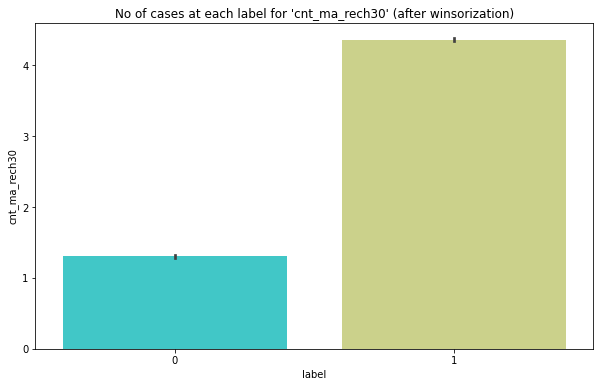

,mean,max,min,count,std
label,,,,,
0,1.299595,20,0,26162,1.975324
1,4.292039,20,0,183431,3.949563


In [136]:
plt.figure(figsize=(10,6))
sns.barplot(x="label",y="cnt_ma_rech30", data=data, palette="rainbow")
plt.title("No of cases at each label for 'cnt_ma_rech30' (after winsorization)")
plt.savefig("bar_cnt_ma_rech30_after.png")
plt.show()
data_copy.groupby("label")["cnt_ma_rech30"].aggregate(["mean", max, min, "count", "std"])

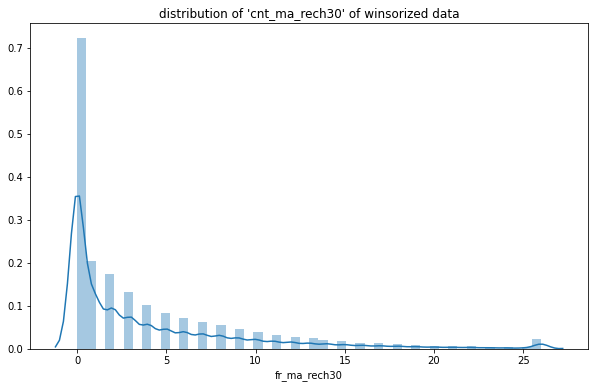

Observation: the distribution of data is rightly skewed and outliers present.


In [237]:
plt.figure(figsize=(10,6))
sns.distplot(a=data_copy["fr_ma_rech30"])
plt.title("distribution of 'cnt_ma_rech30' of winsorized data")
plt.savefig("dist_cnt_ma_rech30_after.png")
plt.show()    
print("Observation: the distribution of data is rightly skewed and outliers present.")

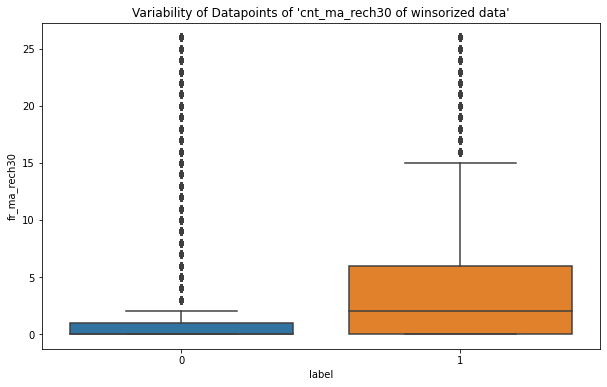

Observation: 
                    -After winsorization of data, Range of 'fr_ma_rech30' datapoints of each label (0 & 1) is 26 times .
                    -As we can see box of label 1 has more length than label 0, we can say middle 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 that is 2 greater than that of label 0.
                    -Also from higher standard deviation of label 0, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
       

,mean,max,min,count,std,median
label,,,,,,
0,1.950577,26.0,0.0,26162,4.724452,0.0
1,4.272533,26.0,0.0,183431,5.584622,2.0


In [128]:
plt.figure(figsize=(10,6))
sns.boxplot(y="fr_ma_rech30", x="label", data=data_copy)
plt.title("Variability of Datapoints of 'cnt_ma_rech30 of winsorized data'")
plt.savefig("box_cnt_ma_rech30_after.png")
plt.show()
print("""Observation: 
                    -After winsorization of data, Range of 'fr_ma_rech30' datapoints of each label (0 & 1) is 26 times .
                    -As we can see box of label 1 has more length than label 0, we can say middle 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 that is 2 greater than that of label 0.
                    -Also from higher standard deviation of label 0, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.""")
data_copy.groupby("label")["fr_ma_rech30"].aggregate(["mean", max, min, "count", "std", "median"])

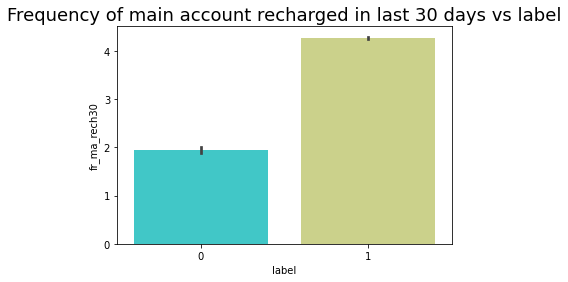

,mean,max,min,count,std
label,,,,,
0,1.950577,26.0,0.0,26162,4.724452
1,4.272533,26.0,0.0,183431,5.584622


In [129]:
sns.barplot(x="label",y="fr_ma_rech30", data=data_copy, palette="rainbow")
plt.title("Frequency of main account recharged in last 30 days vs label", fontsize=18)
plt.savefig("bar_fr_ma_rech30.png")
plt.show()
data_copy.groupby("label")["fr_ma_rech30"].aggregate(["mean", max, min, "count", "std"])

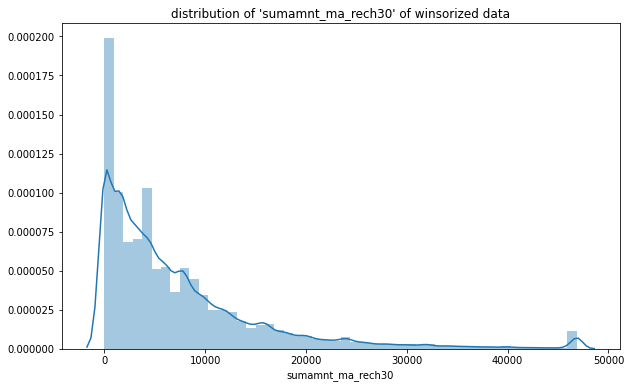

Observation: 
                    -After winsorization of data, Range of 'retal90' datapoints of each label (0 & 1) is 26998 irs .
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard

,mean,max,min,count,std
label,,,,,
0,2236.172617,46874.0,0.0,26162,4234.592056
1,8251.969002,46874.0,0.0,183431,8831.747382


In [132]:
plt.figure(figsize=(10,6))
sns.distplot(a=data_copy["sumamnt_ma_rech30"])
plt.title("distribution of 'sumamnt_ma_rech30' of winsorized data")
plt.savefig("dist_sumamnt_ma_rech30_after.png")
plt.show()    
print("""Observation: 
                    -After winsorization of data, Range of 'retal90' datapoints of each label (0 & 1) is 26998 irs .
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.""")
data_copy.groupby("label")["sumamnt_ma_rech30"].aggregate(["mean", max, min, "count", "std"])

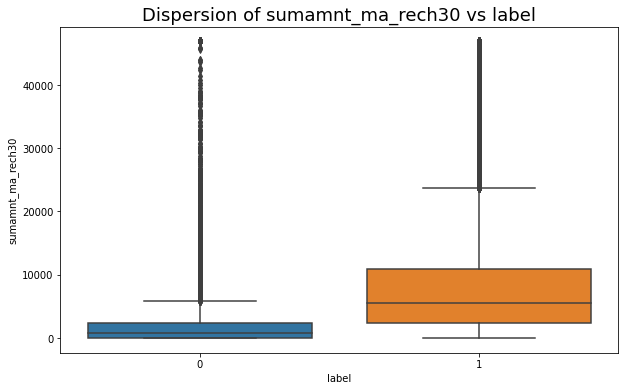

Observation: 
                    -After winsorization of data, Range of 'sumamnt_ma_rech30' datapoints of each label (0 & 1) is 26998 irs .
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -A

,mean,max,min,count,std
label,,,,,
0,2236.172617,46874.0,0.0,26162,4234.592056
1,8251.969002,46874.0,0.0,183431,8831.747382


In [133]:
plt.figure(figsize=(10,6))
sns.boxplot(y="sumamnt_ma_rech30", x="label", data=data_copy)
plt.title("Dispersion of sumamnt_ma_rech30 vs label", fontsize=18)
plt.savefig("box_sumamnt_ma_rech30_after.png")
plt.show()
print("""Observation: 
                    -After winsorization of data, Range of 'sumamnt_ma_rech30' datapoints of each label (0 & 1) is 26998 irs .
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.""")
data_copy.groupby("label")["sumamnt_ma_rech30"].aggregate(["mean", max, min, "count", "std"])

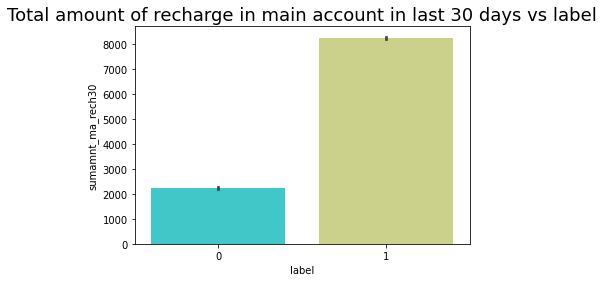

,mean,max,min,count,std
label,,,,,
0,2236.172617,46874.0,0.0,26162,4234.592056
1,8251.969002,46874.0,0.0,183431,8831.747382


In [138]:
sns.barplot(x="label",y="sumamnt_ma_rech30", data=data_copy, palette="rainbow")
plt.title("Total amount of recharge in main account in last 30 days vs label", fontsize=18)
plt.savefig("bar_sumamnt_ma_rech30.png")
plt.show()
data_copy.groupby("label")["sumamnt_ma_rech30"].aggregate(["mean", max, min, "count", "std"])

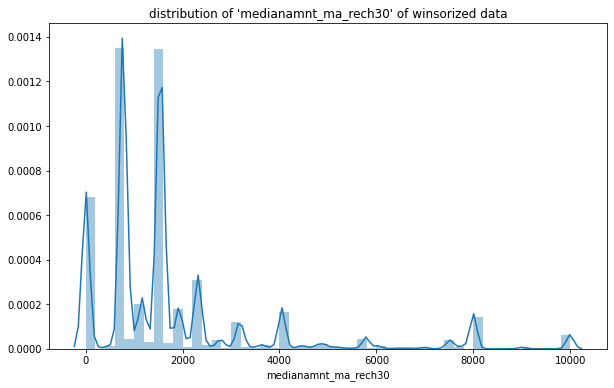

Observation: the distribution of data is rightly skewed and outliers present.


In [140]:
plt.figure(figsize=(10,6))
sns.distplot(a=data_copy["medianamnt_ma_rech30"])
plt.title("distribution of 'medianamnt_ma_rech30' of winsorized data")
plt.savefig("dist_medianamnt_ma_rech30_after.png")
plt.show()    
print("Observation: Data is not continous, the distribution of data is rightly skewed and outliers present.")

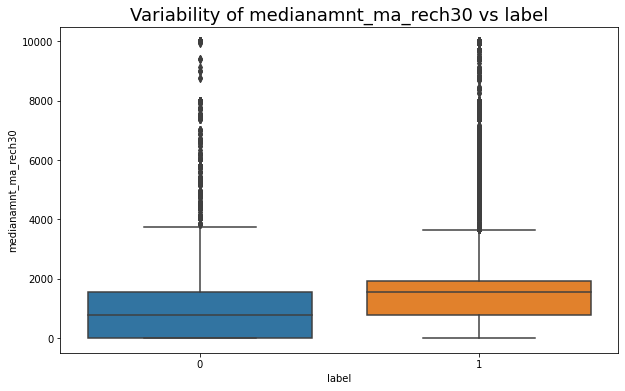

Observation: 
                    -After winsorization of data, Range of 'medianamnt_ma_rech30' datapoints of each label (0 & 1) is 10000 irs .
                    -As we can see box of label 0 has more length than label 1, we can say 50% of the data of label 0 has more variability than of label 1.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                   

,mean,max,min,count,std
label,,,,,
0,1012.684332,10000.0,0.0,26162,1532.754057
1,1908.985172,10000.0,0.0,183431,1985.542362


In [135]:
plt.figure(figsize=(10,6))
sns.boxplot(y="medianamnt_ma_rech30", x="label", data=data_copy)
plt.title("Variability of medianamnt_ma_rech30 vs label", fontsize=18)
plt.savefig("box_medianamnt_ma_rech30_after.png")
plt.show()
print("""Observation: 
                    -After winsorization of data, Range of 'medianamnt_ma_rech30' datapoints of each label (0 & 1) is 10000 irs .
                    -As we can see box of label 0 has more length than label 1, we can say 50% of the data of label 0 has more variability than of label 1.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.""")
data_copy.groupby("label")["medianamnt_ma_rech30"].aggregate(["mean", max, min, "count", "std"])

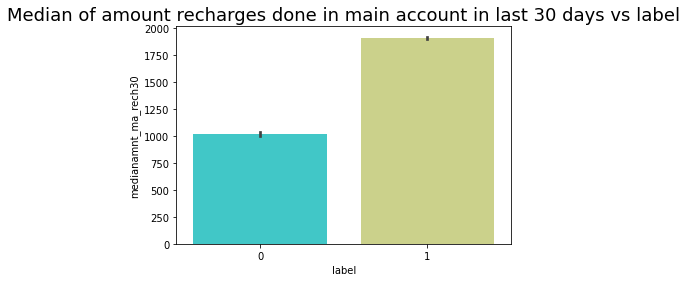

,mean,max,min,count,std
label,,,,,
0,1012.684332,10000.0,0.0,26162,1532.754057
1,1908.985172,10000.0,0.0,183431,1985.542362


In [141]:
sns.barplot(x="label",y="medianamnt_ma_rech30", data=data_copy, palette="rainbow")
plt.title("Median of amount recharges done in main account in last 30 days vs label", fontsize=18)
plt.savefig("bar_medianamnt_ma_rech30.png")
plt.show()
data_copy.groupby("label")["medianamnt_ma_rech30"].aggregate(["mean", max, min, "count", "std"])

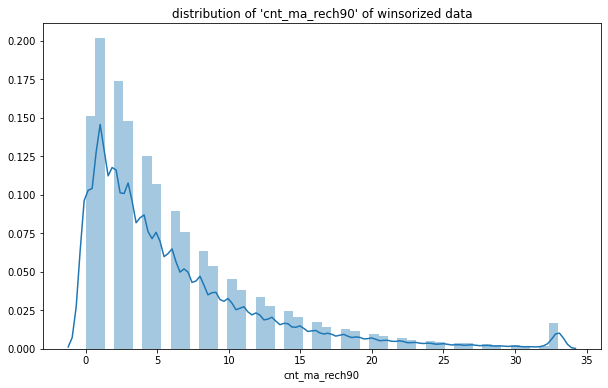

Observation: the distribution of data is rightly skewed and outliers present.


In [252]:
plt.figure(figsize=(10,6))
sns.distplot(a=data_copy["cnt_ma_rech90"])
plt.title("distribution of 'cnt_ma_rech90' of winsorized data")
plt.savefig("dist_cnt_ma_rech90_after.png")
plt.show()    
print("Observation: the distribution of data is rightly skewed and outliers present.")

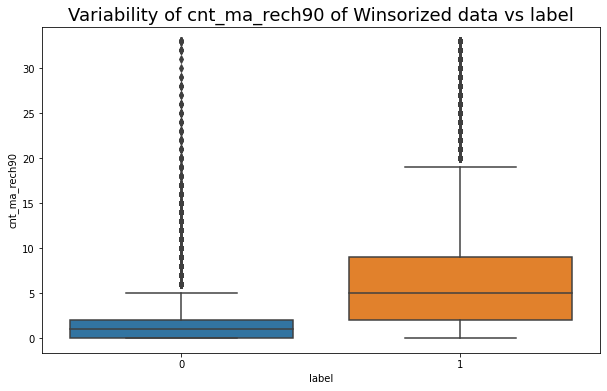

Observation: 
                    -After winsorization of data, Range of 'cnt_ma_rech90' datapoints of each label (0 & 1) is 20 .
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard 

,mean,max,min,count,std
label,,,,,
0,1.299595,20,0,26162,1.975324
1,4.292039,20,0,183431,3.949563


In [137]:
plt.figure(figsize=(10,6))
sns.boxplot(y="cnt_ma_rech90", x="label", data=data_copy)
plt.title("Variability of cnt_ma_rech90 of Winsorized data vs label", fontsize=18)
plt.savefig("box_cnt_ma_rech90_after.png")
plt.show()
print("""Observation: 
                    -After winsorization of data, Range of 'cnt_ma_rech90' datapoints of each label (0 & 1) is 20 .
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.""")
data_copy.groupby("label")["cnt_ma_rech30"].aggregate(["mean", max, min, "count", "std"])

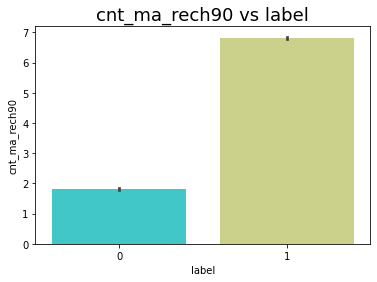

,mean,max,min,count,std
label,,,,,
0,1.810336,33,0,26162,2.747318
1,6.826294,33,0,183431,6.631777


In [138]:
sns.barplot(x="label",y="cnt_ma_rech90", data=data_copy, palette="rainbow")
plt.title("cnt_ma_rech90 vs label", fontsize=18)
plt.savefig("bar_cnt_ma_rech90.png")
plt.show()
data_copy.groupby("label")["cnt_ma_rech90"].aggregate(["mean", max, min, "count", "std"])

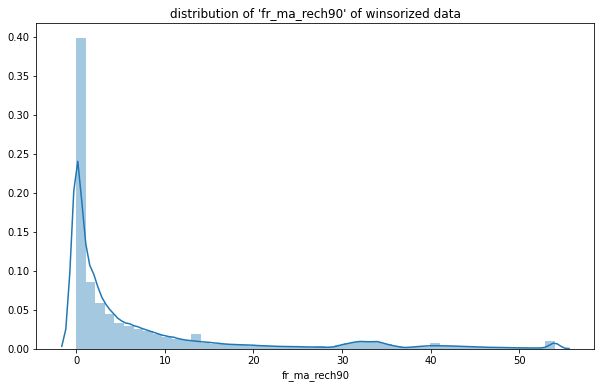

Observation: the distribution of data is rightly skewed and outliers present.


In [139]:
plt.figure(figsize=(10,6))
sns.distplot(a=data_copy["fr_ma_rech90"])
plt.title("distribution of 'fr_ma_rech90' of winsorized data")
plt.savefig("dist_fr_ma_rech90_after.png")
plt.show()    
print("Observation: the distribution of data is rightly skewed and outliers present.")

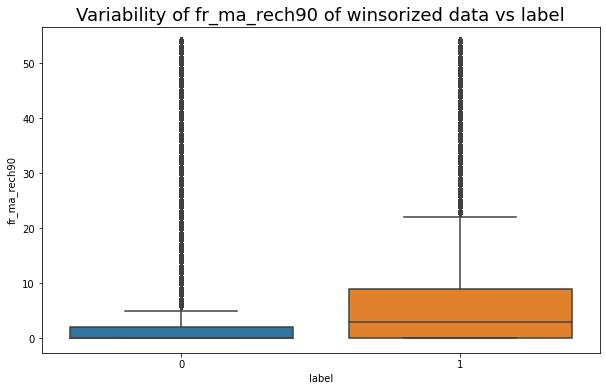

Observation: 
                    -After winsorization of data, Range of 'fr_ma_rech90' datapoints of each label (0 & 1) is 54 times .
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 that is 3 is greater than that of label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
          

,mean,max,min,count,std,median
label,,,,,,
0,4.773182,54,0,26162,11.161138,0
1,8.031227,54,0,183431,12.274519,3


In [144]:
plt.figure(figsize=(10,6))
sns.boxplot(y="fr_ma_rech90", x="label", data=data_copy)
plt.title("Variability of fr_ma_rech90 of winsorized data vs label", fontsize=18)
plt.savefig("box_fr_ma_rech90_after.png")
plt.show()
print("""Observation: 
                    -After winsorization of data, Range of 'fr_ma_rech90' datapoints of each label (0 & 1) is 54 times .
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 that is 3 is greater than that of label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.""")
data_copy.groupby("label")["fr_ma_rech90"].aggregate(["mean", max, min, "count", "std", "median"])

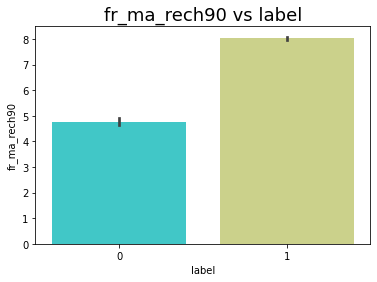

,mean,max,min,count,std
label,,,,,
0,4.773182,54,0,26162,11.161138
1,8.031227,54,0,183431,12.274519


In [170]:
sns.barplot(x="label",y="fr_ma_rech90", data=data_copy, palette="rainbow")
plt.title("fr_ma_rech90 vs label", fontsize=18)
plt.savefig("bar_fr_ma_rech90.png")
plt.show()
data_copy.groupby("label")["fr_ma_rech90"].aggregate(["mean", max, min, "count", "std"])

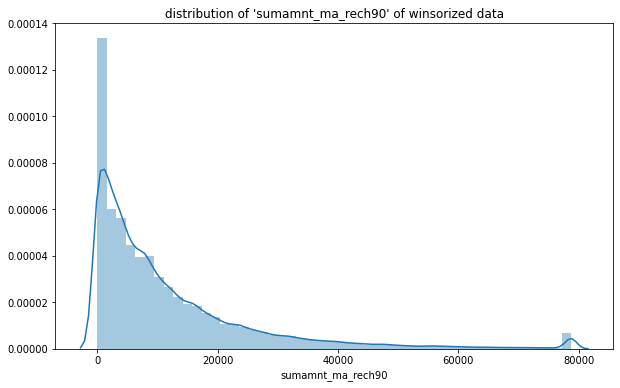

Observation: the distribution of data is rightly skewed and outliers present.


In [117]:
plt.figure(figsize=(10,6))
sns.distplot(a=data_copy["sumamnt_ma_rech90"])
plt.title("distribution of 'sumamnt_ma_rech90' of winsorized data")
plt.savefig("dist_sumamnt_ma_rech90_after.png")
plt.show()    
print("Observation: the distribution of data is rightly skewed and outliers present.")

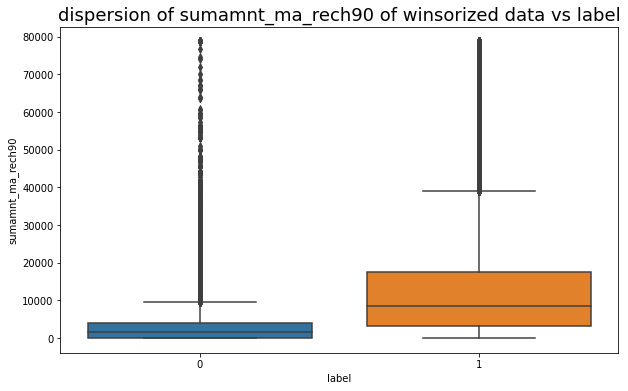

Observation: 
                    -After winsorization of data, Range of 'sumamnt_ma_rech90' datapoints of each label (0 & 1) is 78270 irs .
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -A

,mean,max,min,count,std,median
label,,,,,,
0,3192.327192,78720,0,26162,5992.588510,1539
1,13328.685359,78720,0,183431,14924.309935,8473


In [147]:
plt.figure(figsize=(10,6))
sns.boxplot(y="sumamnt_ma_rech90", x="label", data=data_copy)
plt.title("dispersion of sumamnt_ma_rech90 of winsorized data vs label", fontsize=18)
plt.savefig("box_sumamnt_ma_rech90_after.png")
plt.show()
print("""Observation: 
                    -After winsorization of data, Range of 'sumamnt_ma_rech90' datapoints of each label (0 & 1) is 78270 irs .
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.""")
data_copy.groupby("label")["sumamnt_ma_rech90"].aggregate(["mean", max, min, "count", "std", "median"])

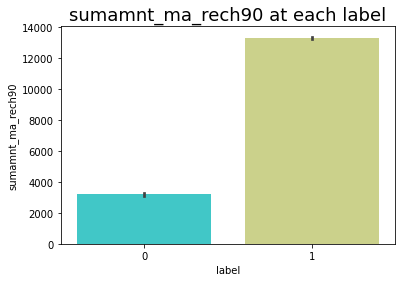

,mean,max,min,count,std
label,,,,,
0,3192.327192,78720,0,26162,5992.588510
1,13328.685359,78720,0,183431,14924.309935


In [148]:
sns.barplot(x="label",y="sumamnt_ma_rech90", data=data_copy, palette="rainbow")
plt.title("sumamnt_ma_rech90 at each label", fontsize=18)
plt.savefig("sumamnt_ma_rech90.png")
plt.show()
data_copy.groupby("label")["sumamnt_ma_rech90"].aggregate(["mean", max, min, "count", "std"])

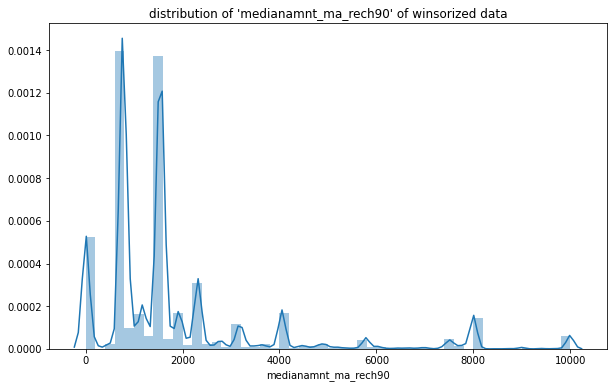

Observation: As we can see, the data is not continuous so the distribution of data is rightly skewed and outliers present.


In [150]:
plt.figure(figsize=(10,6))
sns.distplot(a=data_copy["medianamnt_ma_rech90"])
plt.title("distribution of 'medianamnt_ma_rech90' of winsorized data")
plt.savefig("dist_medianamnt_ma_rech90_after.png")
plt.show()    
print("Observation: As we can see, the data is not continuous so the distribution of data is rightly skewed and outliers present.")

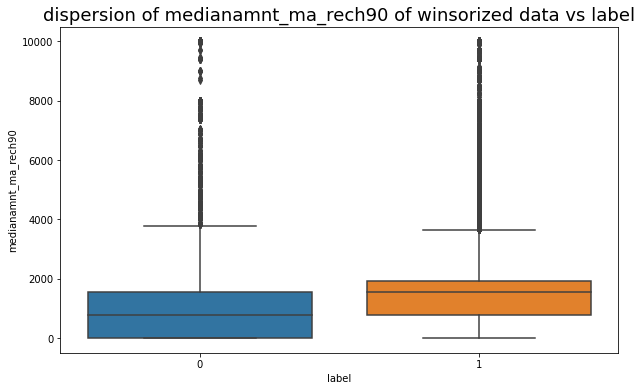

Observation: 
                    -After winsorization of data, Range of 'medianamnt_ma_rech90' datapoints of each label (0 & 1) is 10000 irs .
                    -As we can see box of label 0 has more length than label 1, we can say 50% of the data of label 0 has more variability than of label 1.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                   

,mean,max,min,count,std
label,,,,,
0,1012.684332,10000.0,0.0,26162,1532.754057
1,1908.985172,10000.0,0.0,183431,1985.542362


In [152]:
plt.figure(figsize=(10,6))
sns.boxplot(y="medianamnt_ma_rech90", x="label", data=data_copy)
plt.title("dispersion of medianamnt_ma_rech90 of winsorized data vs label", fontsize=18)
plt.savefig("box_medianamnt_ma_rech90_after.png")
plt.show()
print("""Observation: 
                    -After winsorization of data, Range of 'medianamnt_ma_rech90' datapoints of each label (0 & 1) is 10000 irs .
                    -As we can see box of label 0 has more length than label 1, we can say 50% of the data of label 0 has more variability than of label 1.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.""")
data_copy.groupby("label")["medianamnt_ma_rech30"].aggregate(["mean", max, min, "count", "std"])

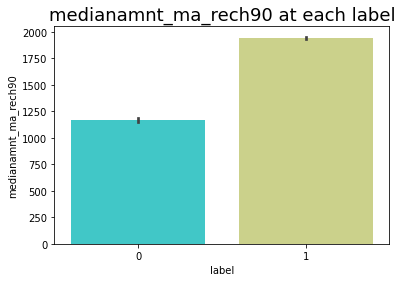

,mean,max,min,count,std
label,,,,,
0,1012.684332,10000.0,0.0,26162,1532.754057
1,1908.985172,10000.0,0.0,183431,1985.542362


In [153]:
sns.barplot(x="label",y="medianamnt_ma_rech90", data=data_copy, palette="rainbow")
plt.title("medianamnt_ma_rech90 at each label", fontsize=18)
plt.savefig("bar_medianamnt_ma_rech90.png")
plt.show()
data_copy.groupby("label")["medianamnt_ma_rech30"].aggregate(["mean", max, min, "count", "std"])

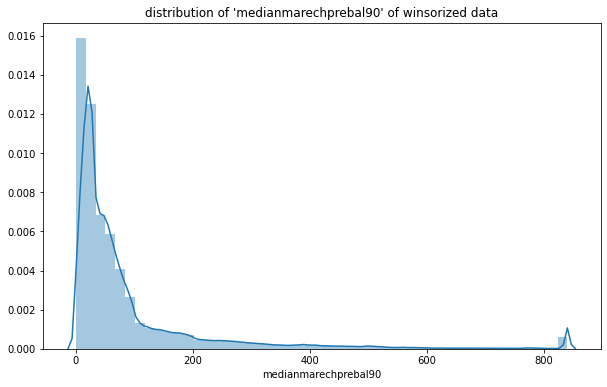

Observation: the distribution of data is rightly skewed and outliers present.


In [154]:
plt.figure(figsize=(10,6))
sns.distplot(a=data_copy["medianmarechprebal90"])
plt.title("distribution of 'medianmarechprebal90' of winsorized data")
plt.savefig("dist_medianmarechprebal90_after.png")
plt.show()    
print("Observation: the distribution of data is rightly skewed and outliers present.")

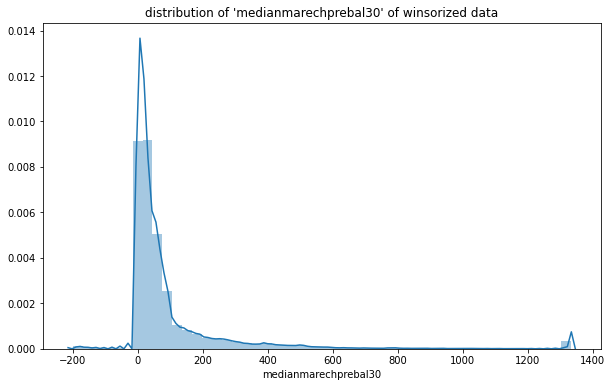

In [149]:
plt.figure(figsize=(10,6))
sns.distplot(a=data_copy["medianmarechprebal30"])
plt.title("distribution of 'medianmarechprebal30' of winsorized data")
plt.savefig("dist_medianmarechprebal30_after.png")
plt.show()    

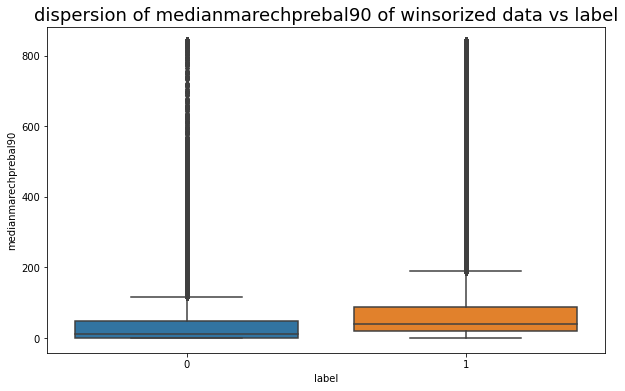

Observation: 
                    -After winsorization of data, Range of medianmaechprebal90 datapoints of each label (0 & 1) is 840.5 irs .
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -A

,mean,max,min,count,std
label,,,,,
0,43.330356,840.5,0.0,26162,102.567542
1,87.262818,840.5,0.0,183431,136.857389


In [156]:
plt.figure(figsize=(10,6))
sns.boxplot(y="medianmarechprebal90", x="label", data=data_copy)
plt.title("dispersion of medianmarechprebal90 of winsorized data vs label", fontsize=18)
plt.savefig("box_medianmarechprebal90_after.png")
plt.show()
print("""Observation: 
                    -After winsorization of data, Range of medianmaechprebal90 datapoints of each label (0 & 1) is 840.5 irs .
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.""")
data_copy.groupby("label")["medianmarechprebal90"].aggregate(["mean", max, min, "count", "std"])

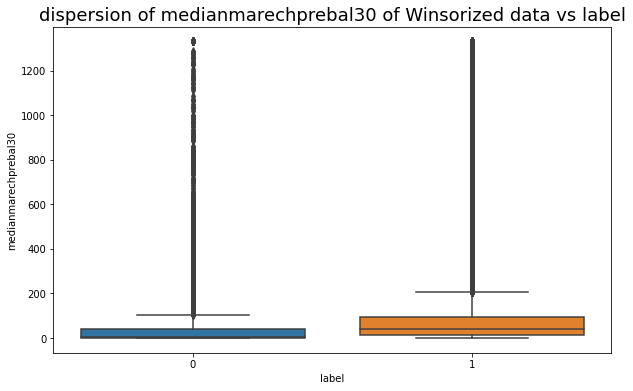

Observation: 
                    -After winsorization of data, Range of 'medianmarechprebal30' datapoints of each label (0 & 1) is 1332.0 irs .
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                  

,mean,max,min,count,std
label,,,,,
0,47.306493,1332.0,0.0,26162,149.620326
1,101.281681,1332.0,0.0,183431,189.235349


In [159]:
plt.figure(figsize=(10,6))
sns.boxplot(y="medianmarechprebal30", x="label", data=data_copy)
plt.title("dispersion of medianmarechprebal30 of Winsorized data vs label", fontsize=18)
plt.savefig("box_medianmarechprebal30_after.png")
plt.show()
print("""Observation: 
                    -After winsorization of data, Range of 'medianmarechprebal30' datapoints of each label (0 & 1) is 1332.0 irs .
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.""")
data_copy.groupby("label")["medianmarechprebal30"].aggregate(["mean", max, min, "count", "std"])

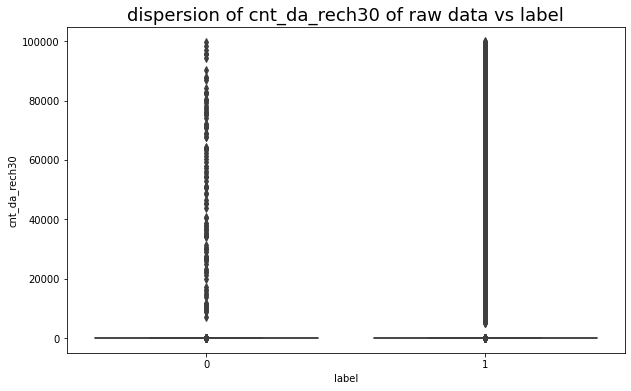

Observation: 
                    -After winsorization of data, Range of 'cnt_da_rech30' datapoints of each label (0 & 1) is 26998 irs .
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As st

,mean,max,min,count,std,median
label,,,,,,
0,220.177745,99665.854254,0.0,26162,3738.621601,0.0
1,268.625497,99914.441420,0.0,183431,4243.575256,0.0


In [162]:
plt.figure(figsize=(10,6))
sns.boxplot(y="cnt_da_rech30", x="label", data=data)
plt.title("dispersion of cnt_da_rech30 of raw data vs label", fontsize=18)
plt.savefig("box_cnt_da_rech30_before.png")
plt.show()
print("""Observation: 
                    -After winsorization of data, Range of 'cnt_da_rech30' datapoints of each label (0 & 1) is 26998 irs .
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.""")
data_copy.groupby("label")["cnt_da_rech30"].aggregate(["mean", max, min, "count", "std", "median"])

In [165]:
data_copy["cnt_da_rech30"]=data_copy["cnt_da_rech30"].apply(lambda x: 30 if x>30 else x)

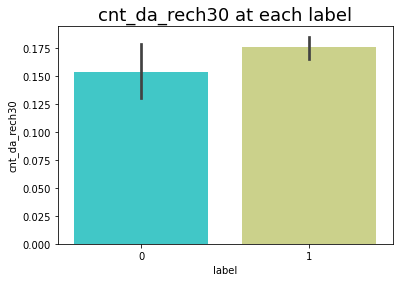

,mean,max,min,count,std
label,,,,,
0,0.153161,30.0,0.0,26162,2.001808
1,0.175586,30.0,0.0,183431,2.147688


In [166]:
sns.barplot(x="label",y="cnt_da_rech30", data=data_copy, palette="rainbow")
plt.title("cnt_da_rech30 at each label", fontsize=18)
plt.savefig("bar_cnt_da_rech30.png")
plt.show()
data_copy.groupby("label")["cnt_da_rech30"].aggregate(["mean", max, min, "count", "std"])

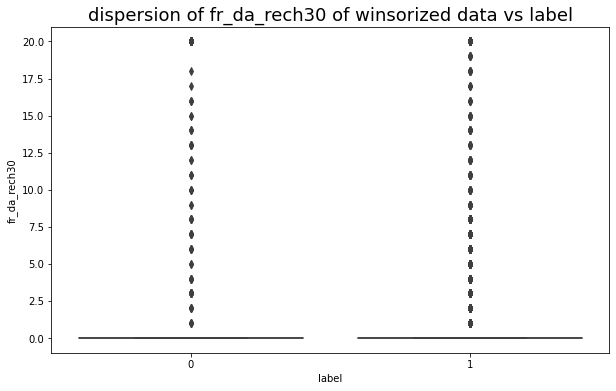

Observation: 
                    -There is no length of box, so we can say data is not continuous.
                    -Also we can say median of label 1 and label 0 is 0. 
                    -Also from higher standard deviation of label 0, we can say datapoints are more spread than label 1.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.


,mean,max,min,count,std,median
label,,,,,,
0,0.122926,20.0,0.0,26162,1.492904,0.0
1,0.117041,20.0,0.0,183431,1.472824,0.0


In [169]:
plt.figure(figsize=(10,6))
sns.boxplot(y="fr_da_rech30", x="label", data=data_copy)
plt.title("dispersion of fr_da_rech30 of winsorized data vs label", fontsize=18)
plt.savefig("box_fr_da_rech30_after.png")
plt.show()
print("""Observation: 
                    -There is no length of box, so we can say data is not continuous.
                    -Also we can say median of label 1 and label 0 is 0. 
                    -Also from higher standard deviation of label 0, we can say datapoints are more spread than label 1.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.""")
data_copy.groupby("label")["fr_da_rech30"].aggregate(["mean", max, min, "count", "std", "median"])

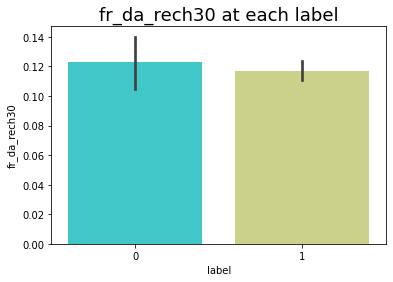

,mean,max,min,count,std,median
label,,,,,,
0,0.122926,20.0,0.0,26162,1.492904,0.0
1,0.117041,20.0,0.0,183431,1.472824,0.0


In [170]:
sns.barplot(x="label",y="fr_da_rech30", data=data_copy, palette="rainbow")
plt.title("fr_da_rech30 at each label", fontsize=18)
plt.savefig("bar_fr_da_rech30.png")
plt.show()
data_copy.groupby("label")["fr_da_rech30"].aggregate(["mean", max, min, "count", "std", "median"])

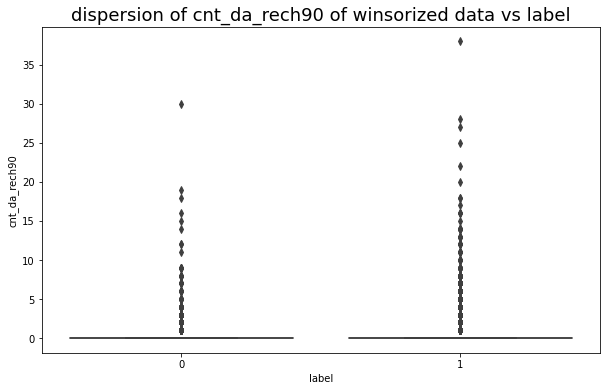

Observation: 
                    -There is no length of box, so we can say data is not continuous.
                    -Also we can say median of label 1 and label 0 is 0. 
                    -Also from higher standard deviation of label 0, we can say datapoints are more spread than label 1.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.


,mean,max,min,count,std,median
label,,,,,,
0,0.153161,30.0,0.0,26162,2.001808,0.0
1,0.175586,30.0,0.0,183431,2.147688,0.0


In [172]:
plt.figure(figsize=(10,6))
sns.boxplot(y="cnt_da_rech90", x="label", data=data)
plt.title("dispersion of cnt_da_rech90 of winsorized data vs label", fontsize=18)
plt.savefig("box_cnt_da_rech90.png")
plt.show()
print("""Observation: 
                    -There is no length of box, so we can say data is not continuous.
                    -Also we can say median of label 1 and label 0 is 0. 
                    -Also from higher standard deviation of label 0, we can say datapoints are more spread than label 1.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.""")
data_copy.groupby("label")["cnt_da_rech30"].aggregate(["mean", max, min, "count", "std", "median"])

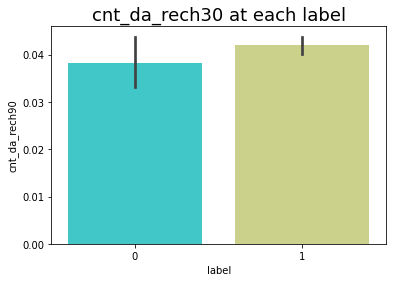

,mean,max,min,count,std
label,,,,,
0,0.038338,30,0,26162,0.454435
1,0.041945,38,0,183431,0.388765


In [174]:
sns.barplot(x="label",y="cnt_da_rech90", data=data, palette="rainbow")
plt.title("cnt_da_rech30 at each label", fontsize=18)
plt.savefig("bar_cnt_da_rech90.png")
plt.show()
data_copy.groupby("label")["cnt_da_rech90"].aggregate(["mean", max, min, "count", "std"])

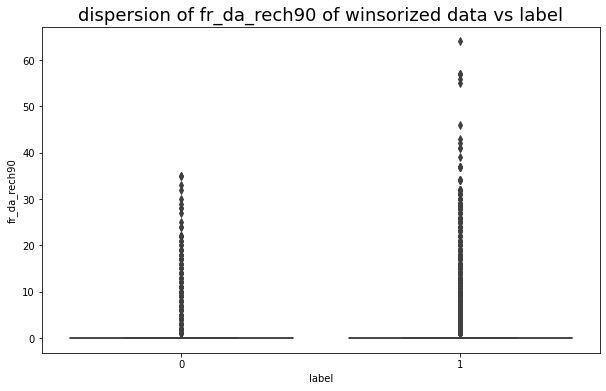

Observation: 
                    -There is no length of box, so we can say data is not continuous.
                    -Also we can say median of label 1 and label 0 is 0. 
                    -Also from higher standard deviation of label 0, we can say datapoints are more spread than label 1.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.


,mean,max,min,count,std,median
label,,,,,,
0,0.122926,20.0,0.0,26162,1.492904,0.0
1,0.117041,20.0,0.0,183431,1.472824,0.0


In [176]:
plt.figure(figsize=(10,6))
sns.boxplot(y="fr_da_rech90", x="label", data=data_copy)
plt.title("dispersion of fr_da_rech90 of winsorized data vs label", fontsize=18)
plt.savefig("box_fr_da_rech90.png")
plt.show()
print("""Observation: 
                    -There is no length of box, so we can say data is not continuous.
                    -Also we can say median of label 1 and label 0 is 0. 
                    -Also from higher standard deviation of label 0, we can say datapoints are more spread than label 1.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.""")
data_copy.groupby("label")["fr_da_rech30"].aggregate(["mean", max, min, "count", "std", "median"])

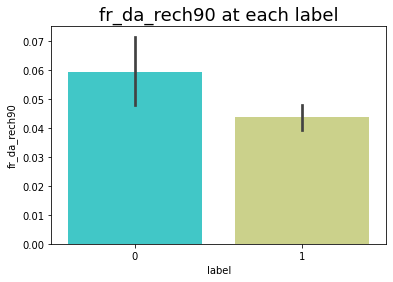

,mean,max,min,count,std
label,,,,,
0,0.059361,35,0,26162,1.000684
1,0.043766,64,0,183431,0.944132


In [179]:
sns.barplot(x="label",y="fr_da_rech90", data=data_copy, palette="rainbow")
plt.title("fr_da_rech90 at each label", fontsize=18)
plt.savefig("bar_fr_da_rech90.png")
plt.show()
data_copy.groupby("label")["fr_da_rech90"].aggregate(["mean", max, min, "count", "std"])

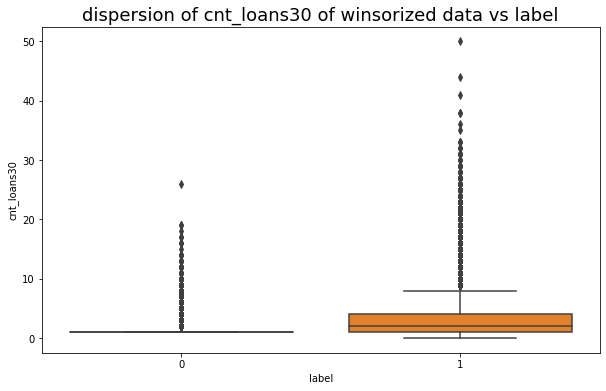

Observation: 
                    -There is no length of box of label 0, so we can say data is not continuous.
                    -Also we can say median of label 1 is greater than 0. 
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is lower than mean.


,mean,max,min,count,std,median
label,,,,,,
0,1.431313,26,1,26162,1.100109,1
1,2.948340,50,0,183431,2.645055,2


In [178]:
plt.figure(figsize=(10,6))
sns.boxplot(y="cnt_loans30", x="label", data=data_copy)
plt.title("dispersion of cnt_loans30 of winsorized data vs label", fontsize=18)
plt.savefig("box_cnt_loans30.png")
plt.show()
print("""Observation: 
                    -There is no length of box of label 0, so we can say data is not continuous.
                    -Also we can say median of label 1 is greater than 0. 
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is lower than mean.""")
data_copy.groupby("label")["cnt_loans30"].aggregate(["mean", max, min, "count", "std", "median"])

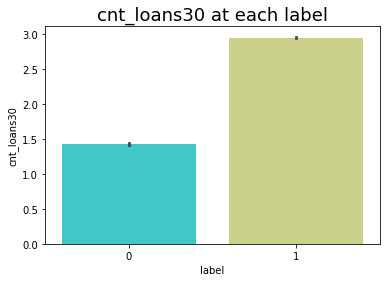

,mean,max,min,count,std
label,,,,,
0,1.431313,26,1,26162,1.100109
1,2.948340,50,0,183431,2.645055


In [179]:
sns.barplot(x="label",y="cnt_loans30", data=data_copy, palette="rainbow")
plt.title("cnt_loans30 at each label", fontsize=18)
plt.savefig("bar_cnt_loans30.png")
plt.show()
data_copy.groupby("label")["cnt_loans30"].aggregate(["mean", max, min, "count", "std"])

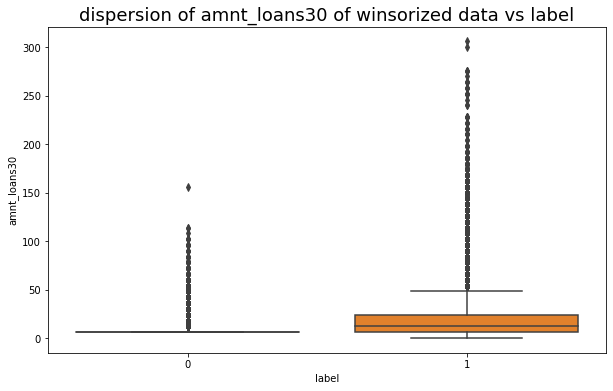

Observation: 
                    -There is no length of box of label 0, so we can say data is not continuous.
                    -Also we can say median of label 1 is greater than 0. 
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is lower than mean.


,mean,max,min,count,std,median
label,,,,,,
0,8.873634,156,6,26162,7.213658,6
1,19.246834,306,0,183431,18.007875,12


In [181]:
plt.figure(figsize=(10,6))
sns.boxplot(y="amnt_loans30", x="label", data=data_copy)
plt.title("dispersion of amnt_loans30 of winsorized data vs label", fontsize=18)
plt.savefig("box_amnt_loans30.png")
plt.show()
print("""Observation: 
                    -There is no length of box of label 0, so we can say data is not continuous.
                    -Also we can say median of label 1 is greater than 0. 
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is lower than mean.""")
data_copy.groupby("label")["amnt_loans30"].aggregate(["mean", max, min, "count", "std", "median"])

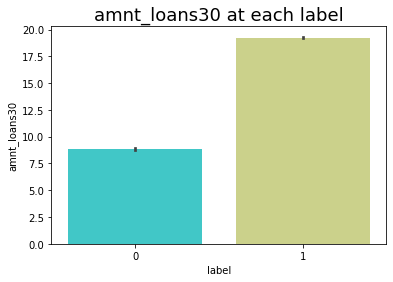

,mean,max,min,count,std
label,,,,,
0,8.873634,156,6,26162,7.213658
1,19.246834,306,0,183431,18.007875


In [184]:
sns.barplot(x="label",y="amnt_loans30", data=data_copy, palette="rainbow")
plt.title("amnt_loans30 at each label", fontsize=18)
plt.savefig("bar_amnt_loans30.png")
plt.show()
data_copy.groupby("label")["amnt_loans30"].aggregate(["mean", max, min, "count", "std"])

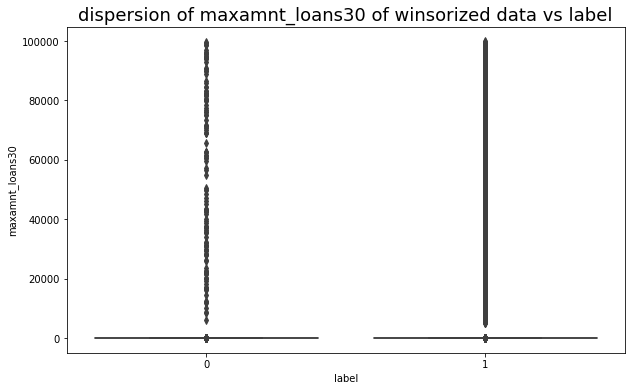

Observation: 
                    -There is no length of box, so we can say data is not continuous.
                    -Also we can say median of label 1 and label 0 is 0. 
                    -Also from higher standard deviation of label 0, we can say datapoints are more spread than label 1.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.


,mean,max,min,count,std,median
label,,,,,,
0,271.873754,99571.106262,6.0,26162,4258.032852,6.0
1,275.055959,99864.560864,0.0,183431,4243.451929,6.0


In [183]:
plt.figure(figsize=(10,6))
sns.boxplot(y="maxamnt_loans30", x="label", data=data_copy)
plt.title("dispersion of maxamnt_loans30 of winsorized data vs label", fontsize=18)
plt.savefig("box_maxamnt_loans30.png")
plt.show()
print("""Observation: 
                    -There is no length of box, so we can say data is not continuous.
                    -Also we can say median of label 1 and label 0 is 0. 
                    -Also from higher standard deviation of label 0, we can say datapoints are more spread than label 1.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.""")
data_copy.groupby("label")["maxamnt_loans30"].aggregate(["mean", max, min, "count", "std", "median"])

In [26]:
data_copy["maxamnt_loans30"].describe()
data_copy["maxamnt_loans30"].value_counts()
data_copy["maxamnt_loans30"]=data_copy["maxamnt_loans30"].apply(lambda x: 12 if x>12 else x)

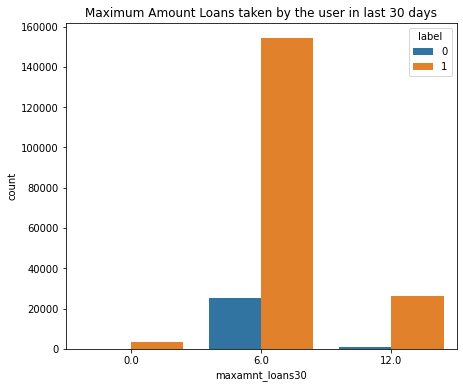

Observation: As we see from the plot, most number of people have taken 5 irs loans and had to pay 6 irs. after that 27156 people have taken loan of 10 irs, had to pay 12 and 3244 customers have not taken any loan in last 30 days.


label  maxamnt_loans30
0      6.0                 25013
       12.0                 1149
1      6.0                154180
       12.0                26007
       0.0                  3244
Name: maxamnt_loans30, dtype: int64

In [32]:
plt.figure(figsize=(7,6))
sns.countplot(x="maxamnt_loans30", hue="label", data=data_copy)
plt.title("Maximum Amount Loans taken by the user in last 30 days")
plt.savefig("maxamnt_loans30")
plt.show()
print("Observation: As we see from the plot, most number of people have taken 5 irs loans and had to pay 6 irs. after that 27156 people have taken loan of 10 irs, had to pay 12 and 3244 customers have not taken any loan in last 30 days.")
data_copy.groupby("label")["maxamnt_loans30"].value_counts()


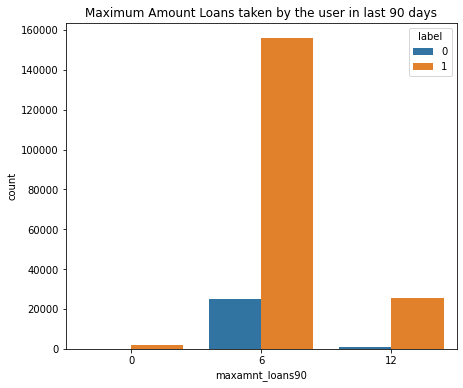

Observation: As we see from the plot, most number of people have taken 5 irs loans and had to pay 6 irs. after that 27156 people have taken loan of 10 irs, had to pay 12 and 3244 customers have not taken any loan in last 30 days.


label  maxamnt_loans90
0      6                   25140
       12                   1022
1      6                  155805
       12                  25583
       0                    2043
Name: maxamnt_loans90, dtype: int64

In [33]:
plt.figure(figsize=(7,6))
sns.countplot(x="maxamnt_loans90", hue="label", data=data_copy)
plt.title("Maximum Amount Loans taken by the user in last 90 days")
plt.savefig("maxamnt_loans90")
plt.show()
print("Observation: As we see from the plot, most number of people have taken 5 irs loans and had to pay 6 irs. after that 27156 people have taken loan of 10 irs, had to pay 12 and 3244 customers have not taken any loan in last 30 days.")
data_copy.groupby("label")["maxamnt_loans90"].value_counts()


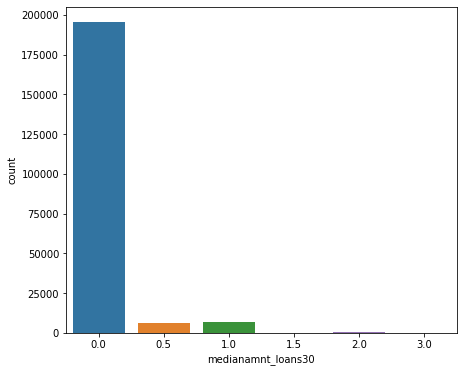

0.0    195445
1.0      7149
0.5      6538
2.0       420
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64

In [42]:
plt.figure(figsize=(7,6))
sns.countplot(x="medianamnt_loans30", data=data_copy)
plt.show()
data_copy["medianamnt_loans30"].value_counts()

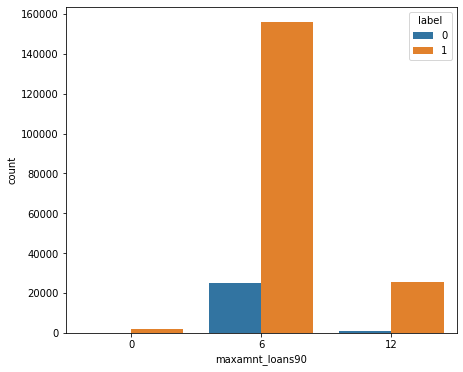

Observation: As we see from the plot, we can state that, most number of defaulter had taken a loan of 5 irs, then it is 10 irs.


In [46]:
plt.figure(figsize=(7,6))
sns.countplot(x="maxamnt_loans90", hue="label", data=data_copy)
plt.show()
data["maxamnt_loans90"].value_counts()
print("Observation: As we see from the plot, we can state that, most number of defaulter had taken a loan of 5 irs, then it is 10 irs.")

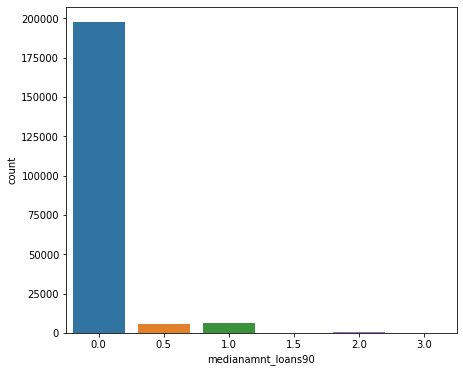

0.0    197424
1.0      6172
0.5      5668
2.0       307
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64

In [48]:
plt.figure(figsize=(7,6))
sns.countplot(x="medianamnt_loans90", data=data_copy)
plt.show()
data_copy["medianamnt_loans90"].value_counts()

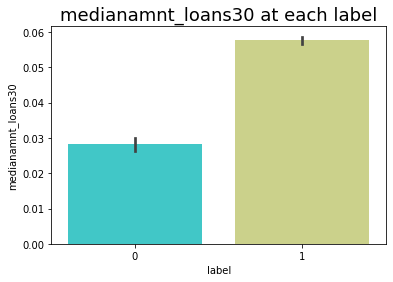

,mean,max,min,count,std
label,,,,,
0,0.028285,1.0,0.0,26162,0.152583
1,0.057700,3.0,0.0,183431,0.225595


In [47]:
sns.barplot(x="label",y="medianamnt_loans30", data=data_copy, palette="rainbow")
plt.title("medianamnt_loans30 at each label", fontsize=18)
plt.savefig("bar_medianamnt_loans30.png")
plt.show()
data_copy.groupby("label")["medianamnt_loans30"].aggregate(["mean", max, min, "count", "std"])

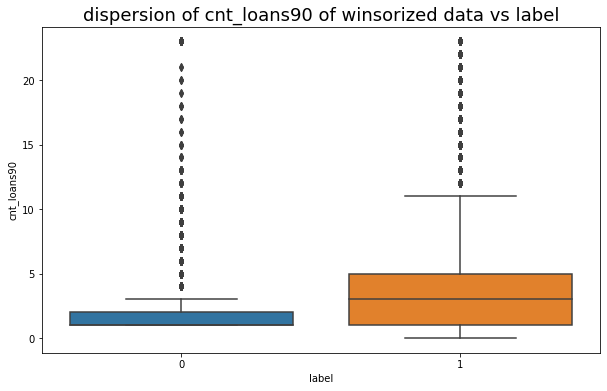

Observation: 
                    -After winsorization of data, Range of cnt_loans90 datapoints of each label (0 & 1) is 840.5 irs .
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standa

,mean,max,min,count,std
label,,,,,
0,43.330356,840.5,0.0,26162,102.567542
1,87.262818,840.5,0.0,183431,136.857389


In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(y="cnt_loans90", x="label", data=data_copy)
plt.title("dispersion of cnt_loans90 of winsorized data vs label", fontsize=18)
plt.savefig("box_cnt_loans90.png")
plt.show()
print("""Observation: 
                    -After winsorization of data, Range of cnt_loans90 datapoints of each label (0 & 1) is 840.5 irs .
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.""")
data_copy.groupby("label")["medianmarechprebal90"].aggregate(["mean", max, min, "count", "std"])

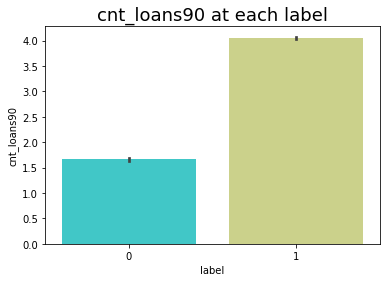

,mean,max,min,count,std
label,,,,,
0,1.661379,23.0,1.0,26162,2.022646
1,4.056991,23.0,0.0,183431,4.170419


In [52]:
sns.barplot(x="label",y="cnt_loans90", data=data_copy, palette="rainbow")
plt.title("cnt_loans90 at each label", fontsize=18)
plt.savefig("bar_cnt_loans90.png")
plt.show()
data_copy.groupby("label")["cnt_loans90"].aggregate(["mean", max, min, "count", "std"])

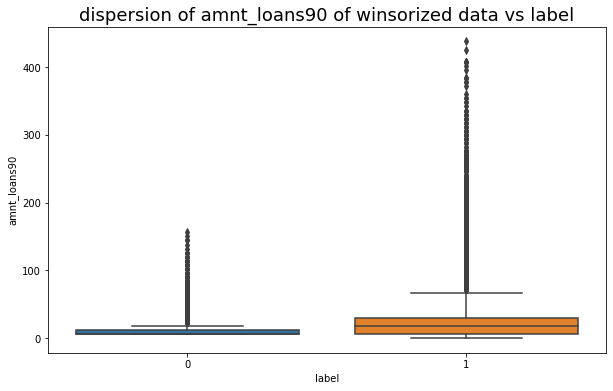

Observation: 
                    -After winsorization of data, Range of amnt_loans90 datapoints of label 1 is 438 irs and of label it is 150 irs.
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                

,mean,max,min,count,std
label,,,,,
0,9.642382,156,6,26162,8.976451
1,25.642590,438,0,183431,27.516137


In [55]:
plt.figure(figsize=(10,6))
sns.boxplot(y="amnt_loans90", x="label", data=data_copy)
plt.title("dispersion of amnt_loans90 of winsorized data vs label", fontsize=18)
plt.savefig("box_amnt_loans90.png")
plt.show()
print("""Observation: 
                    -After winsorization of data, Range of amnt_loans90 datapoints of label 1 is 438 irs and of label it is 150 irs.
                    -As we can see box of label 1 has more length than label 0, we can say 50% of the data of label 1 has more variability than of label 0.
                    -For label 0: there is no whisker at lower end, no whisker will be visible if the lower quartile is equal to the minimum. So whisker from 3rd quartile to max is longer than minimum to 1st quartile ,the data is rightly skewed.
                    -For label 1: upper whisker is longer than lower whisker , the data is rightly skewed.
                    -Also we can say median of label 1 is greater than label 0. 
                    -Also from higher standard deviation of label 1, we can say datapoints are more spread than label 0.
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is more than mean, then data needs more treatment.""")
data_copy.groupby("label")["amnt_loans90"].aggregate(["mean", max, min, "count", "std"])

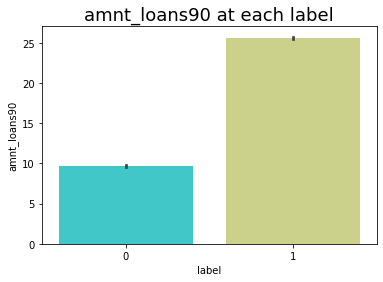

,mean,max,min,count,std
label,,,,,
0,9.642382,156,6,26162,8.976451
1,25.642590,438,0,183431,27.516137


In [56]:
sns.barplot(x="label",y="amnt_loans90", data=data_copy, palette="rainbow")
plt.title("amnt_loans90 at each label", fontsize=18)
plt.savefig("bar_amnt_loans90.png")
plt.show()
data_copy.groupby("label")["amnt_loans90"].aggregate(["mean", max, min, "count", "std"])

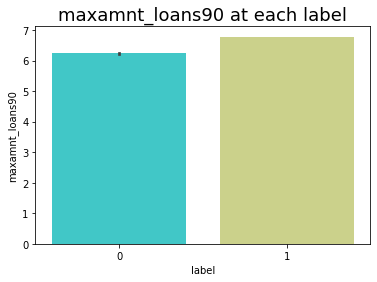

,mean,max,min,count,std
label,,,,,
0,6.234386,12,6,26162,1.162510
1,6.769990,12,0,183431,2.197498


In [196]:
sns.barplot(x="label",y="maxamnt_loans90", data=data_copy, palette="rainbow")
plt.title("maxamnt_loans90 at each label", fontsize=18)
plt.savefig("bar_maxamnt_loans90.png")
plt.show()
data_copy.groupby("label")["maxamnt_loans90"].aggregate(["mean", max, min, "count", "std"])

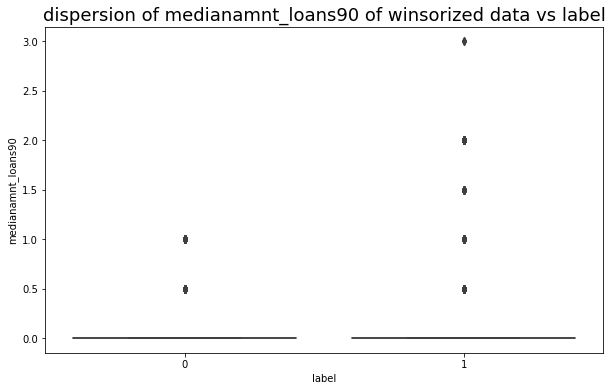

In [198]:
plt.figure(figsize=(10,6))
sns.boxplot(y="medianamnt_loans90", x="label", data=data_copy)
plt.title("dispersion of medianamnt_loans90 of winsorized data vs label", fontsize=18)
plt.savefig("box_medianamnt_loans90.png")
plt.show()

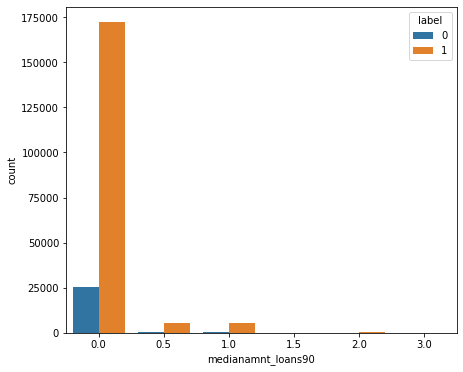

Observation: As we see from the plot, we can state that, most number of defaulter had taken a loan of 5 irs, then it is 10 irs.


In [61]:
plt.figure(figsize=(7,6))
sns.countplot(x="medianamnt_loans90", hue="label", data=data_copy)
plt.show()
data["medianamnt_loans90"].value_counts()
print("Observation: As we see from the plot, we can state that, most number of defaulter had taken a loan of 5 irs, then it is 10 irs.")

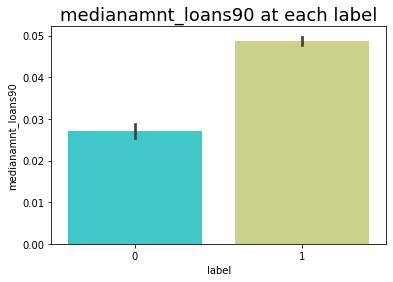

,mean,max,min,count,std
label,,,,,
0,0.027081,1.0,0.0,26162,0.148584
1,0.048787,3.0,0.0,183431,0.206916


In [199]:
sns.barplot(x="label",y="medianamnt_loans90", data=data_copy, palette="rainbow")
plt.title("medianamnt_loans90 at each label", fontsize=18)
plt.savefig("bar_medianamnt_loans90.png")
plt.show()
data_copy.groupby("label")["medianamnt_loans90"].aggregate(["mean", max, min, "count", "std"])

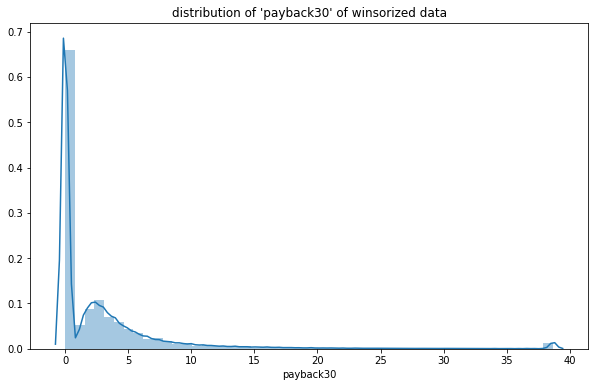

In [62]:
plt.figure(figsize=(10,6))
sns.distplot(a=data_copy["payback30"])
plt.title("distribution of 'payback30' of winsorized data")
plt.savefig("dist_payback30_after.png")
plt.show() 
print("Observation: Positively skewed data.")

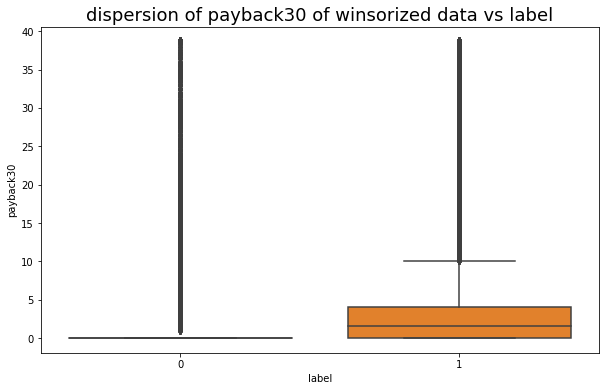

Observation: 
                    -There is no length of box of label 0, so we can say data is not continuous.
                    -Also we can say median of label 1 is greater than 0. 
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is lower than mean.


,mean,max,min,count,std,median
label,,,,,,
0,1.832664,38.666667,0.0,26162,6.189958,0.0
1,3.254279,38.666667,0.0,183431,5.839735,1.5


In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(y="payback30", x="label", data=data_copy)
plt.title("dispersion of payback30 of winsorized data vs label", fontsize=18)
plt.savefig("box_payback30_after.png")
plt.show()
print("""Observation: 
                    -There is no length of box of label 0, so we can say data is not continuous.
                    -Also we can say median of label 1 is greater than 0. 
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is lower than mean.""")
data_copy.groupby("label")["payback30"].aggregate(["mean", max, min, "count", "std", "median"])

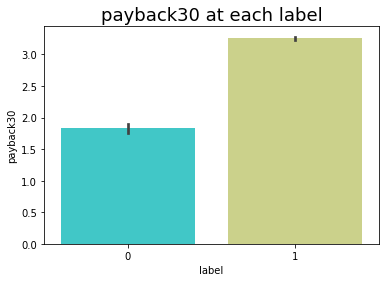

,mean,max,min,count,std
label,,,,,
0,1.832664,38.666667,0.0,26162,6.189958
1,3.254279,38.666667,0.0,183431,5.839735


In [205]:
sns.barplot(x="label",y="payback30", data=data_copy, palette="rainbow")
plt.title("payback30 at each label", fontsize=18)
plt.savefig("bar_payback30.png")
plt.show()
data_copy.groupby("label")["payback30"].aggregate(["mean", max, min, "count", "std"])

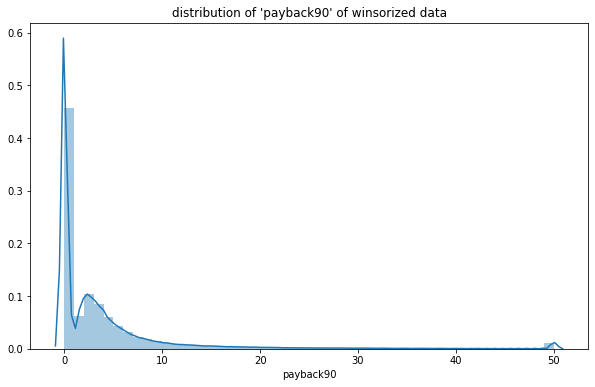

Observation: the data is positively skewed.


In [67]:
plt.figure(figsize=(10,6))
sns.distplot(a=data_copy["payback90"])
plt.title("distribution of 'payback90' of winsorized data")
plt.savefig("dist_payback90_after.png")
plt.show()  
print("Observation: the data is positively skewed.")

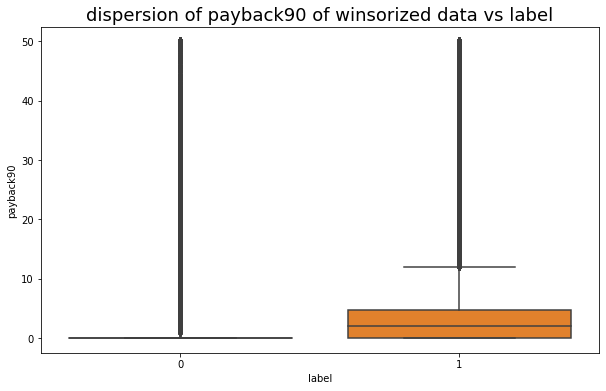

Observation: 
                    -There is no length of box of label 0, so we can say data is not continuous.
                    -Also we can say median of label 1 is greater than 0. 
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is lower than mean.


,mean,max,min,count,std,median
label,,,,,,
0,2.553277,50.0,0.0,26162,8.093860,0.00
1,4.213084,50.0,0.0,183431,7.581888,2.04


In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(y="payback90", x="label", data=data_copy)
plt.title("dispersion of payback90 of winsorized data vs label", fontsize=18)
plt.savefig("box_payback90_after.png")
plt.show()
print("""Observation: 
                    -There is no length of box of label 0, so we can say data is not continuous.
                    -Also we can say median of label 1 is greater than 0. 
                    -From the difference between mean and standard deviation we can say more outliers are present in label 0.
                    -As standard deviation is lower than mean.""")
data_copy.groupby("label")["payback90"].aggregate(["mean", max, min, "count", "std", "median"])

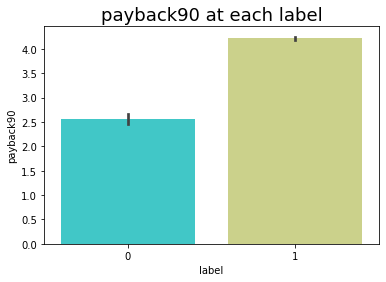

,mean,max,min,count,std
label,,,,,
0,2.553277,50.0,0.0,26162,8.093860
1,4.213084,50.0,0.0,183431,7.581888


In [70]:
sns.barplot(x="label",y="payback90", data=data_copy, palette="rainbow")
plt.title("payback90 at each label", fontsize=18)
plt.savefig("bar_payback90.png")
plt.show()
data_copy.groupby("label")["payback90"].aggregate(["mean", max, min, "count", "std"])

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

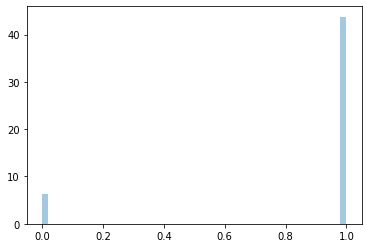

In [45]:
for i in features:
    sns.distplot(data_copy[i])
    plt.show()

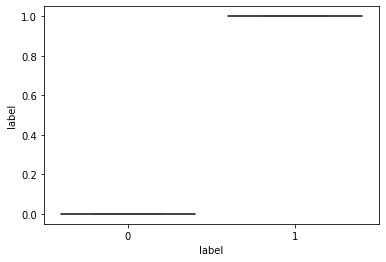

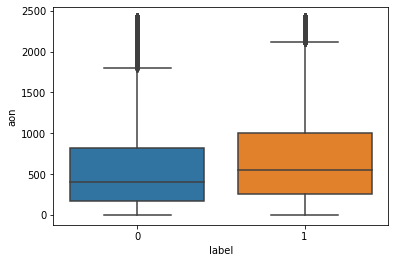

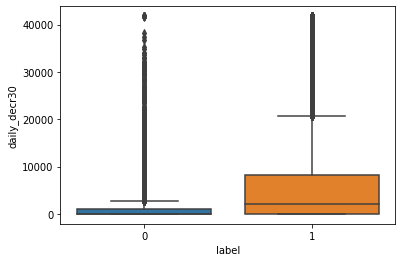

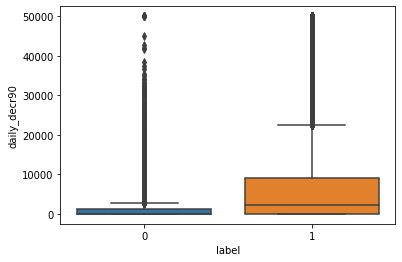

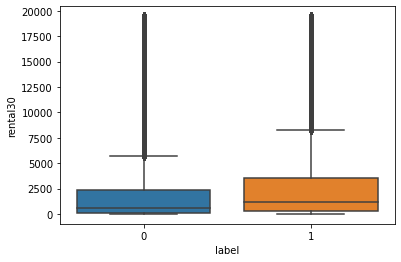

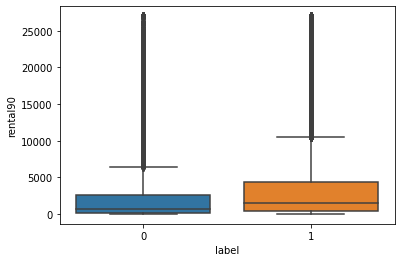

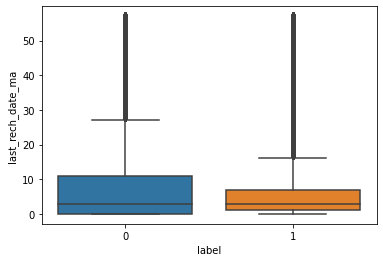

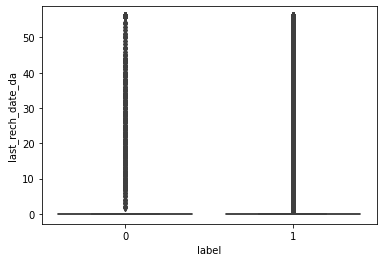

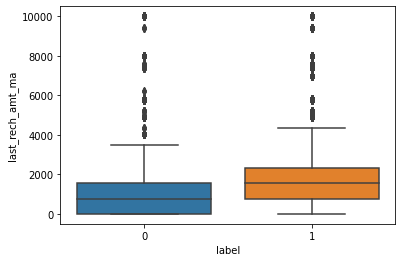

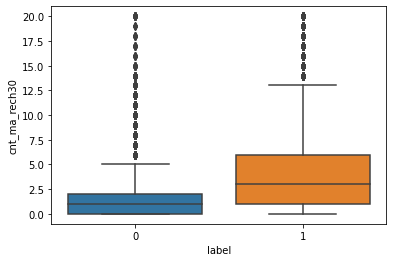

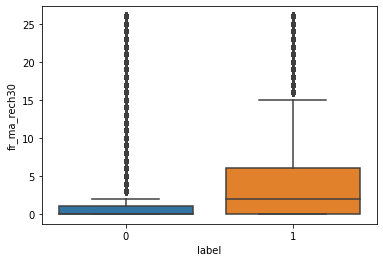

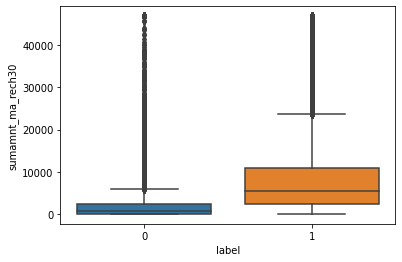

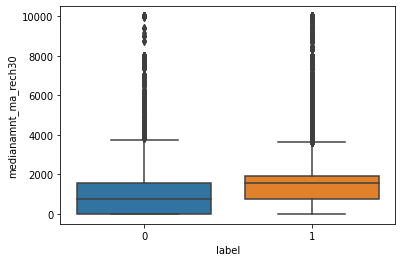

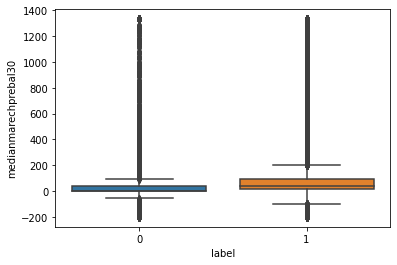

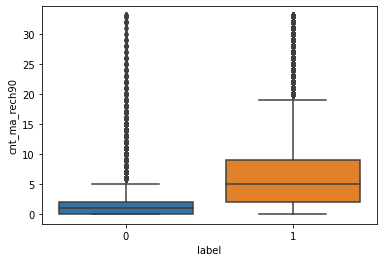

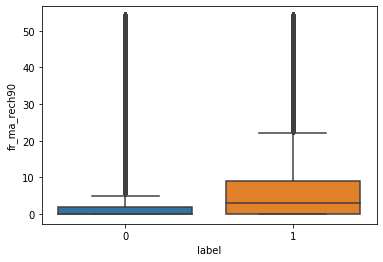

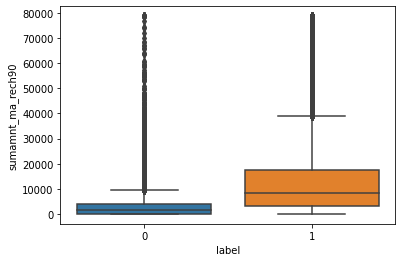

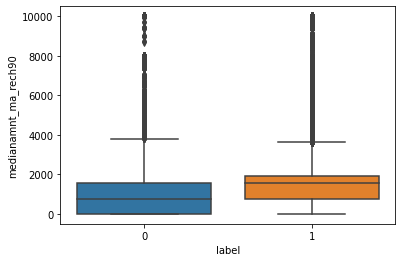

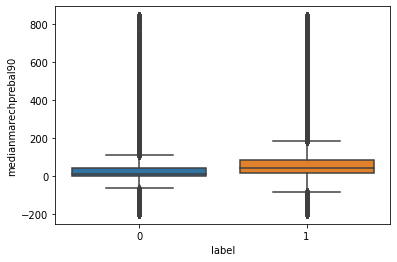

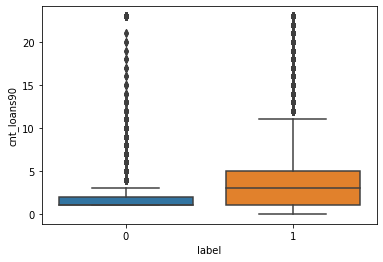

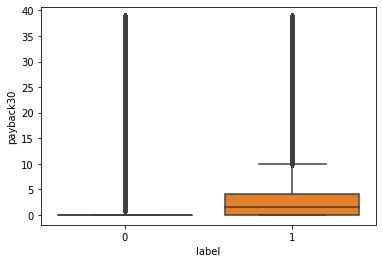

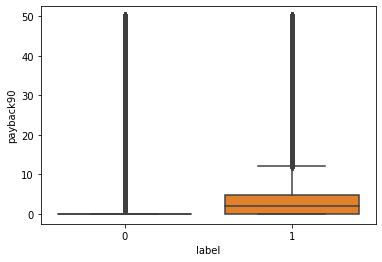

In [46]:
for i in features:
    sns.boxplot(y=data_copy[i], x="label", data=data)
    plt.show()

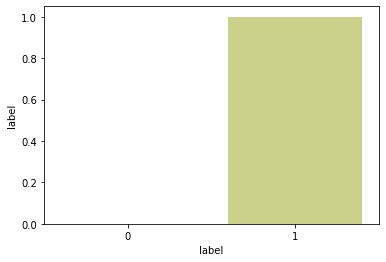

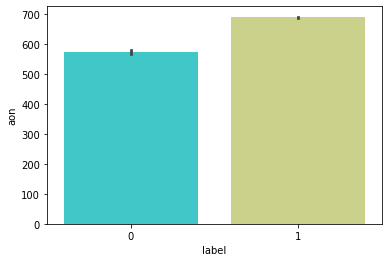

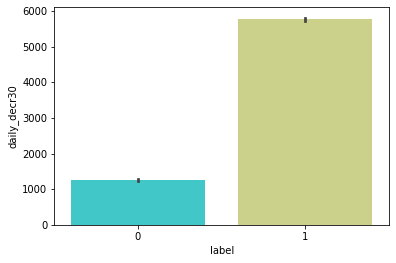

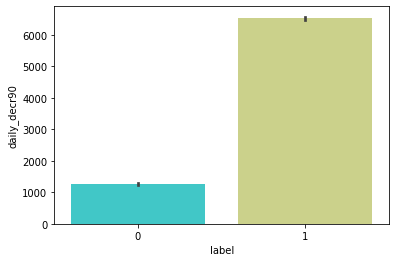

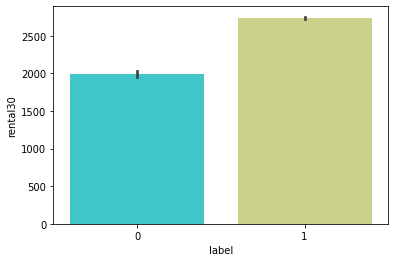

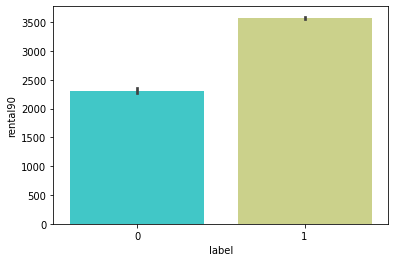

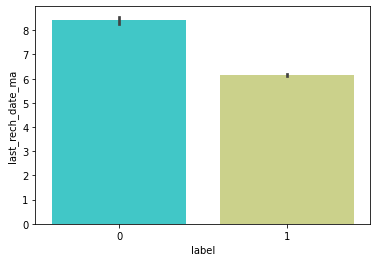

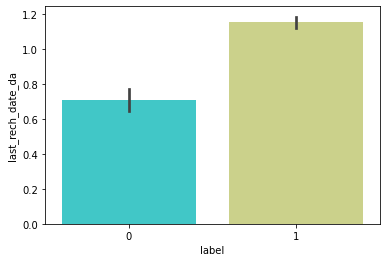

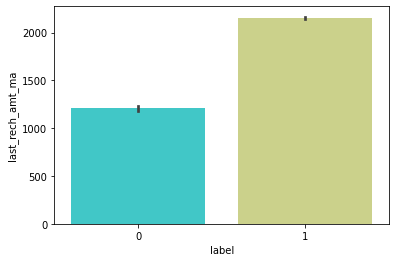

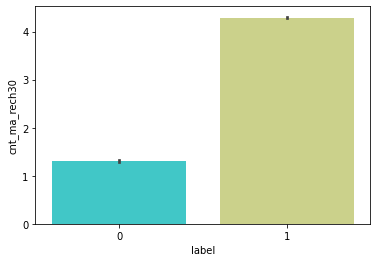

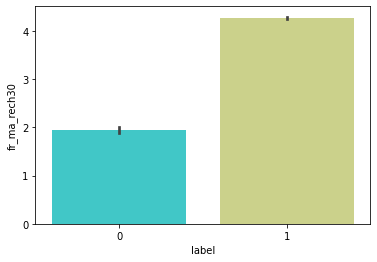

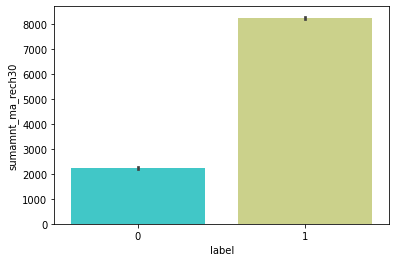

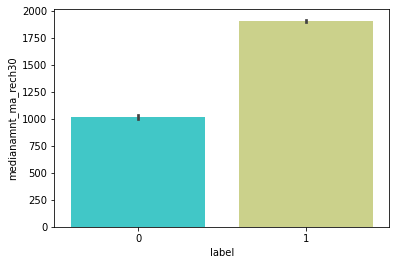

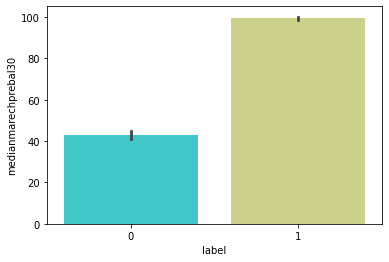

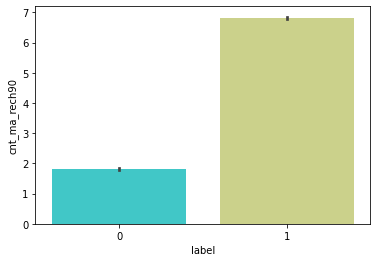

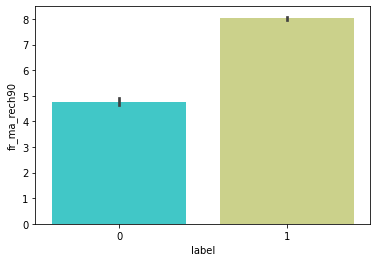

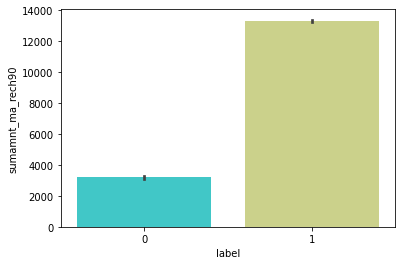

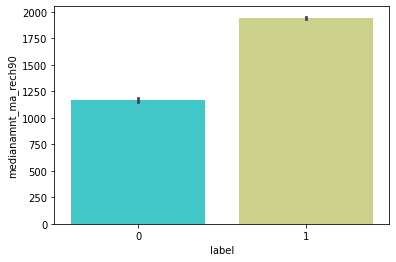

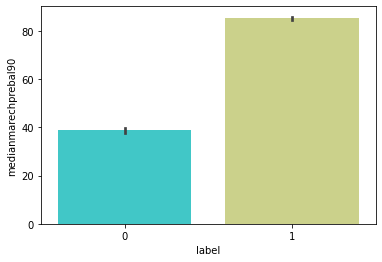

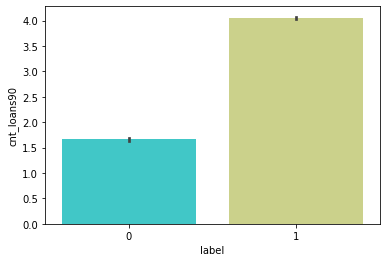

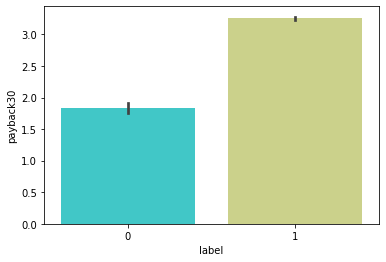

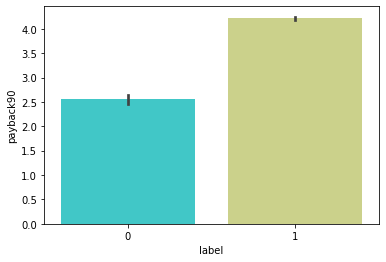

In [48]:
for i in features:
    sns.barplot(x="label",y=data_copy[i], data=data_copy, palette="rainbow")
    plt.show()
    data.groupby("label")[i].aggregate(["mean", max, min, "count", "std"])

In [71]:
#to handle the outliers
from scipy.stats import zscore
z=np.abs(zscore(data_copy))

In [74]:
data_mod=data_copy[(z<3).all(axis=1)]

In [75]:
corrmat=data_copy.corr()

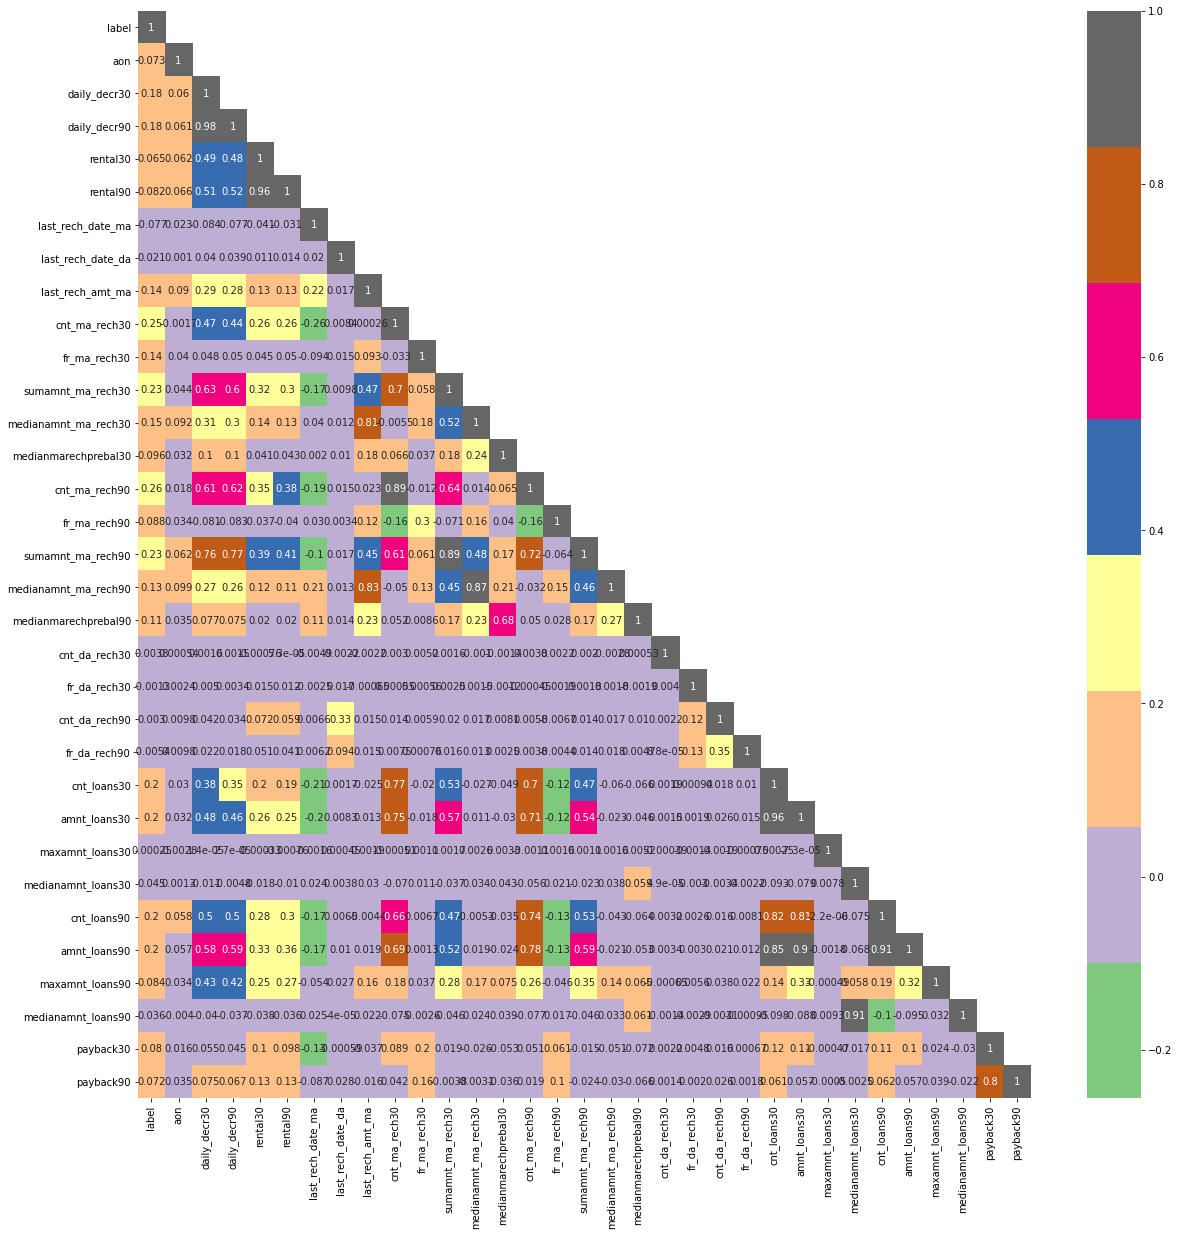

In [76]:
plt.figure(figsize=(20,20))
m=np.ones_like(corrmat)
m[np.tril_indices_from(m)]=0
sns.heatmap(corrmat, annot=True, cmap="Accent", mask=m)
plt.show()

In [77]:
data_copy.drop(columns=["medianmarechprebal90", "medianmarechprebal30", "medianamnt_loans30", "medianamnt_loans90"], inplace=True)

In [78]:
X=data_copy.drop(columns="label")
y=data_copy.label

In [79]:
#to handle the skewness
X.skew()
import numpy as np
for col in X.columns:
    if X[col].skew()>.55:
        X[col]=np.log1p(X[col])

In [80]:
X.skew()

aon                     -0.568832
daily_decr30            -0.447892
daily_decr90            -0.424133
rental30                -1.250125
rental90                -1.190666
last_rech_date_ma        0.515879
last_rech_date_da        5.658933
last_rech_amt_ma        -2.198261
cnt_ma_rech30           -0.049921
fr_ma_rech30             0.396043
sumamnt_ma_rech30       -1.770237
medianamnt_ma_rech30    -1.871382
cnt_ma_rech90           -0.078255
fr_ma_rech90             0.508268
sumamnt_ma_rech90       -2.033024
medianamnt_ma_rech90    -2.240584
cnt_da_rech30           13.709136
fr_da_rech30            12.135415
cnt_da_rech90            8.491552
fr_da_rech90            18.083017
cnt_loans30              0.720970
amnt_loans30            -0.026725
maxamnt_loans30          9.512099
cnt_loans90              0.758377
amnt_loans90             0.241660
maxamnt_loans90         -2.409904
payback30                0.793742
payback90                0.684555
dtype: float64

In [81]:
import numpy as np
for col in X.columns:
    if X[col].skew()>.55:
        X[col]=np.log1p(X[col])

In [82]:
import numpy as np
for col in X.columns:
    if X[col].skew()>.55:
        X[col]=np.log1p(X[col])

In [83]:
X.skew()

aon                     -0.568832
daily_decr30            -0.447892
daily_decr90            -0.424133
rental30                -1.250125
rental90                -1.190666
last_rech_date_ma        0.515879
last_rech_date_da        5.390662
last_rech_amt_ma        -2.198261
cnt_ma_rech30           -0.049921
fr_ma_rech30             0.396043
sumamnt_ma_rech30       -1.770237
medianamnt_ma_rech30    -1.871382
cnt_ma_rech90           -0.078255
fr_ma_rech90             0.508268
sumamnt_ma_rech90       -2.033024
medianamnt_ma_rech90    -2.240584
cnt_da_rech30            9.552157
fr_da_rech30            11.650157
cnt_da_rech90            6.470547
fr_da_rech90            16.161955
cnt_loans30              0.082902
amnt_loans30            -0.026725
maxamnt_loans30         -1.203309
cnt_loans90              0.219194
amnt_loans90             0.241660
maxamnt_loans90         -2.409904
payback30                0.341542
payback90                0.172088
dtype: float64

In [84]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson", standardize=True, copy=True)
pt.fit(X)
pt.transform(X)

array([[-0.6889133 ,  0.55156836,  0.52992311, ..., -0.29446406,
         1.52426025,  1.5124511 ],
       [ 0.38664666,  1.070914  ,  1.03462645, ...,  2.36398552,
        -0.96422756, -1.05718278],
       [ 0.04461335,  0.26514971,  0.24885124, ..., -0.29446406,
        -0.96422756, -1.05718278],
       ...,
       [ 0.83556866,  1.06200008,  1.0277966 , ...,  2.36398552,
         1.01318562,  0.83281403],
       [ 1.57686586,  1.08231989,  1.04819008, ...,  2.36398552,
        -0.96422756,  1.22180562],
       [ 1.44574609,  0.69482957,  0.67213639, ...,  2.36398552,
        -0.96422756, -1.05718278]])

In [86]:
#to handle multi collinearity of predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor as vifs
vif=pd.DataFrame()
vif["Features"]=X.columns
vif["VIF"]=[vifs(X.values,i) for i in range(X.shape[1])]
vif

,Features,VIF
0,aon,33.906572
1,daily_decr30,2837.213228
2,daily_decr90,2910.067395
3,rental30,268.589461
4,rental90,294.720263
5,last_rech_date_ma,7.489188
6,last_rech_date_da,3.870946
7,last_rech_amt_ma,267.233937
8,cnt_ma_rech30,252.815983
9,fr_ma_rech30,3.895154


In [89]:
data.drop (columns=["daily_decr90","sumamnt_ma_rech30", "sumamnt_ma_rech90"], inplace=True)

In [90]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
X_pca=pca.fit_transform(X)

In [91]:
X=X_pca
X=pd.DataFrame(X)

In [92]:
#performing standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_=sc.fit_transform(X)
X_mod=pd.DataFrame(X_, columns=X.columns)

In [94]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test=split(X_mod,y, random_state=123, test_size=.2)

In [132]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [95]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

Using TensorFlow backend.


In [96]:
X_train_smote, y_train_smote=smote.fit_sample(X_train.astype('float'), y_train) 

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,confusion_matrix,roc_auc_score as auc, roc_curve, classification_report
models=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=3)]
for model in models:
    model.fit(X_train_smote, y_train_smote)
    model.score(X_train_smote, y_train_smote)
    y_pred=model.predict(X_test)
    print("for model:", model)
    print("acc_score:", accuracy_score(y_test, y_pred))
    kfold=StratifiedKFold(n_splits=10,random_state=123, shuffle=True)
    sc=cross_val_score(model,X,y, cv=kfold, scoring="accuracy").mean()
    print("Cross_val_score:", sc)
    print("mse:",mean_absolute_error(y_test, y_pred))
    print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))
    fpr,tpr,thr=roc_curve(y_test, y_pred)
    print("roc_auc_score:",auc(y_test,y_pred))
    print("Classification Report: ", classification_report(y_test,y_pred))
    print("Cofusion Matrix:", confusion_matrix(y_test,y_pred))
    print("*********************************************")
    print()
    print()

for model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
acc_score: 0.7527851332331401
Cross_val_score: 0.8830352182050089
mse: 0.2472148667668599
rmse: 0.49720706628814104
roc_auc_score: 0.7526051959112393
Classification Report:                precision    recall  f1-score   support

           0       0.30      0.75      0.43      5177
           1       0.96      0.75      0.84     36742

    accuracy                           0.75     41919
   macro avg       0.63      0.75      0.64     41919
weighted avg       0.87      0.75      0.79     41919

Cofusion Matrix: [[ 3895  1282]
 [ 9081 27661]]
*********************************************


for model: GaussianNB(priors=None, var_smoothing=1e-09)
acc_score:

In [98]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,confusion_matrix,roc_auc_score as auc, roc_curve, classification_report
rfc=RandomForestClassifier(n_estimators=100)
gbc=GradientBoostingClassifier()
tech=[rfc,gbc]
for model in tech:
    model.fit(X_train_smote, y_train_smote)
    model.score(X_train_smote, y_train_smote)
    y_pred=model.predict(X_test)
    print("for model:", model)
    print("acc_score:", accuracy_score(y_test, y_pred))
    print("mse:",mean_absolute_error(y_test, y_pred))
    print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))
    fpr,tpr,thr=roc_curve(y_test, y_pred)
    print("roc_auc_score:",auc(y_test,y_pred))
    print("Classification Report: ", classification_report(y_test,y_pred))
    print("Cofusion Matrix:", confusion_matrix(y_test,y_pred))
    print("*********************************************")
    print()
    print()

for model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
acc_score: 0.8803645125122259
mse: 0.11963548748777404
rmse: 0.3458836328706145
roc_auc_score: 0.7668872414591084
Classification Report:                precision    recall  f1-score   support

           0       0.51      0.62      0.56      5177
           1       0.94      0.92      0.93     36742

    accuracy                           0.88     41919
   macro avg       0.73      0.77      0.75     41919
weighted avg       0.89      0.8

In [99]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
final_model=RandomForestClassifier(n_estimators=100)
final_model.fit(X_train_smote, y_train_smote)
final_model.score(X_train, y_train)
final_model.score(X_train_smote, y_train_smote)
y_pred=final_model.predict(X_test)
print("for model:", final_model)
print("acc_score:", accuracy_score(y_test, y_pred))
kfold=StratifiedKFold(n_splits=10,random_state=123, shuffle=True)
sc=cross_val_score(final_model,X,y, cv=kfold, scoring="accuracy").mean()
print("mse:",mean_absolute_error(y_test, y_pred))
print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))
fpr,tpr,thr=roc_curve(y_test, y_pred)
print("roc_auc_score:",auc(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))
print("Cofusion Matrix:", confusion_matrix(y_test,y_pred))

for model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
acc_score: 0.8800782461413679
mse: 0.11992175385863213
rmse: 0.3462972045203832
roc_auc_score: 0.7680515026354566
Classification Report:                precision    recall  f1-score   support

           0       0.51      0.62      0.56      5177
           1       0.94      0.92      0.93     36742

    accuracy                           0.88     41919
   macro avg       0.73      0.77      0.75     41919
weighted avg       0.89      0.8

In [128]:
from sklearn.externals import joblib
joblib.dump(final_model, "Micro_Defaulter_Predictor.obj")

['Micro_Defaulter_Predictor.obj']